| phi0B | mphi | A6 | lambda6 | ns | Ps | r | phi* | 

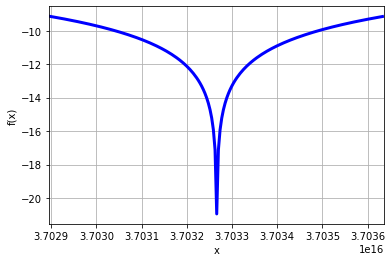

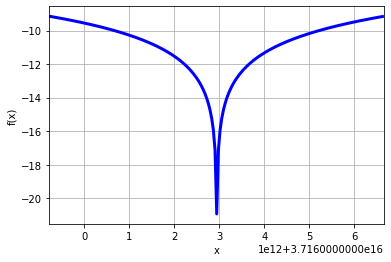

In [2]:
import pandas as pd
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt
from mpmath import *
mp.dps= 150

def define_plot_resolution():
    fig = plt.gcf()  # get current figure0

    DPI = fig.get_dpi()
#     fig.set_size_inches(1920.0 / float(DPI), 1080.0 / float(DPI))
    fig.set_size_inches(12, 8)
    ax = plt.gca()
    for tickLabel in ax.get_xticklabels()+ax.get_yticklabels():
        tickLabel.set_fontsize(29)
    ax.yaxis.label.set_size(29)
    ax.xaxis.label.set_size(29)
    ax.yaxis.offsetText.set_fontsize(29)
    ax.xaxis.offsetText.set_fontsize(29)
    return



m0_lle_09530 = pd.read_csv('lin_lle_m0_2098903167319144_0953.csv',engine='python',dtype=str)
m0_lle_09653 = pd.read_csv('lin_lle_m0_2098903167319144_09653.csv',engine='python',dtype=str)
m0_lle_09776 = pd.read_csv('lin_lle_m0_2098903167319144_09776.csv',engine='python',dtype=str)
m0_Tree_lle_09530 = pd.read_csv('lin_tree_lle_m0_2098903167319144_0953.csv',engine='python',dtype=str)
m0_Tree_lle_09653 = pd.read_csv('lin_tree_lle_m0_2098903167319144_09653.csv',engine='python',dtype=str)
m0_Tree_lle_09776 = pd.read_csv('lin_tree_lle_m0_2098903167319144_09776.csv',engine='python',dtype=str)

m0_udd_09530 = pd.read_csv('lin_udd_m0_2098903167319144_0953.csv',engine='python',dtype=str)
m0_udd_09653 = pd.read_csv('lin_udd_m0_2098903167319144_09653.csv',engine='python',dtype=str)
m0_udd_09776 = pd.read_csv('lin_udd_m0_2098903167319144_09776.csv',engine='python',dtype=str)
m0_Tree_udd_09530 = pd.read_csv('lin_tree_udd_m0_2098903167319144_0953.csv',engine='python',dtype=str)
m0_Tree_udd_09653 = pd.read_csv('lin_tree_udd_m0_2098903167319144_09653.csv',engine='python',dtype=str)
m0_Tree_udd_09776 = pd.read_csv('lin_tree_udd_m0_2098903167319144_09776.csv',engine='python',dtype=str)

def pd_to_array(file, column, dtype=float):
    if dtype == float:
        return np.array([mp.mpf(x) for x in file[column]], dtype=float)
    else:
        return np.array([mp.mpf(x) for x in file[column]])
    
print(end='| ')
for col in m0_lle_09653.columns[1:]:
    print(col, end=' | ')

##############

mphi_lle = lambda phi, phigut, mphigut : mphigut*mp.sqrt(mp.mpf('1')+xi**2*(mp.mpf('1')-(g2(phi, phigut)/g2gut)**mp.mpf('4'))+xi**2*mp.mpf('1')/11*(mp.mpf('1')-(g1(phi, phigut)/g1gut)**mp.mpf('4')))
lambda6_lle = lambda phi, phigut, lambda6gut : lambda6gut*(g2gut/g2(phi, phigut))**mp.mpf('6')*(g2gut/g2(phi, phigut))**(mp.mpf('6')/11)
A6_lle = lambda phi, phigut, mphigut, A6gut : A6gut+mphigut*xi*(mp.mpf('6')*(mp.mpf('1')-(g2(phi, phigut)/g2gut)**mp.mpf('2'))-mp.mpf('6')/11*(mp.mpf('1')-(g1(phi, phigut)/g1gut)**mp.mpf('2')))

mphi_udd = lambda phi, phigut, mphigut : mphigut*mp.sqrt(mp.mpf('1')+xi**2*mp.mpf('-8')/9*(mp.mpf('1')-(g3(phi, phigut)/g3gut)**mp.mpf('4'))+xi**2*mp.mpf('4')/99*(mp.mpf('1')-(g1(phi, phigut)/g1gut)**mp.mpf('4')))
lambda6_udd = lambda phi, phigut, lambda6gut : lambda6gut*(g3gut/g3(phi, phigut))**(mp.mpf('-8')/9*mp.mpf('6'))*(g3gut/g3(phi, phigut))**(mp.mpf('6')*mp.mpf('4')/99)
A6_udd = lambda phi, phigut, mphigut, A6gut : A6gut+mphigut*xi*((mp.mpf('-8')/9*mp.mpf('6'))*(mp.mpf('1')-(g3(phi, phigut)/g3gut)**mp.mpf('2'))-mp.mpf('6')*mp.mpf('4')/99*(mp.mpf('1')-(g1(phi, phigut)/g1gut)**mp.mpf('2')))

lnMpinGev = mp.mpf('42.334')
Mp = mp.exp(lnMpinGev)

mphi_tree = lambda phi, phigut, mphigut : mphigut
lambda6_tree = lambda phi, phigut, lambda6gut : lambda6gut
A6_tree = lambda phi, phigut, A6gut, mphigut : A6gut

g1gut, g2gut, g3gut = mp.sqrt(mp.pi/mp.mpf('6')), mp.sqrt(mp.pi/mp.mpf('6')), mp.sqrt(mp.pi/mp.mpf('6'))
pre = mp.mpf('1')/(mp.mpf('8')*mp.pi**2)
b1, b2, b3 = mp.mpf('33')/mp.mpf('5'), mp.mpf('1'), mp.mpf('-3')
g1 = lambda phi, phigut : g1gut/(mp.sqrt(1-pre*b1*g1gut**2*mp.log(phi/phigut)))
g2 = lambda phi, phigut : g2gut/(mp.sqrt(1-pre*b2*g2gut**2*mp.log(phi/phigut)))
g3 = lambda phi, phigut : g3gut/(mp.sqrt(1-pre*b3*g3gut**2*mp.log(phi/phigut)))

xi = mp.mpf('1') # éventuellement le passer en argument
m1gut = lambda mphigut : xi*mphigut
m2gut = lambda mphigut : xi*mphigut
m3gut = lambda mphigut : xi*mphigut
m1 = lambda phi, phigut, mphigut : m1gut(mphigut)*(g1(phi, phigut)/g1gut)**mp.mpf('2')
m2 = lambda phi, phigut, mphigut : m2gut(mphigut)*(g2(phi, phigut)/g2gut)**mp.mpf('2')
m3 = lambda phi, phigut, mphigut : m3gut(mphigut)*(g3(phi, phigut)/g3gut)**mp.mpf('2')

mphi_lle = lambda phi, phigut, mphigut : mp.sqrt(mphigut**2+(m2gut(mphigut)**2-m2(phi, phigut, mphigut)**2)+mp.mpf('1')/11*(m1gut(mphigut)**2-m1(phi, phigut,mphigut)**2))
A6_lle = lambda phi, phigut, A6gut, mphigut : A6gut-mp.mpf('6')*(m2gut(mphigut)-m2(phi, phigut, mphigut))-mp.mpf('6')/11*(m1gut(mphigut)-m1(phi, phigut,mphigut))
lambda6_lle = lambda phi, phigut, lambda6gut : lambda6gut*(g2gut/g2(phi, phigut))**mp.mpf('6')*(g1gut/g1(phi, phigut))**(mp.mpf('6')/11)
mphi_udd = lambda phi, phigut, mphigut : mp.sqrt(mphigut**2-mp.mpf('8')/9*(m3gut(mphigut)**2-m3(phi, phigut, mphigut)**2)+mp.mpf('4')/99*(m1gut(mphigut)**2-m1(phi, phigut, mphigut)**2))
A6_udd = lambda phi, phigut, A6gut, mphigut : A6gut+mp.mpf('16')/3*(m3gut(mphigut)-m3(phi, phigut, mphigut))-mp.mpf('8')/33*(m1gut(mphigut)-m1(phi, phigut, mphigut))
lambda6_udd = lambda phi, phigut, lambda6gut : lambda6gut*(g3gut/g3(phi, phigut))**(mp.mpf('-16')/3)*(g1gut/g1(phi, phigut))**(mp.mpf('8')/33)

def V_MSSM(phi, infl_type, mphigut, A6gut, lambda6gut):
    phigut = mp.mpf('3e16')
    if infl_type == 0 or infl_type == 'tree':
        mphi_func, A6_func, lambda6_func = mphi_tree, A6_tree, lambda6_tree
    elif infl_type == 1 or infl_type == 'lle':
        mphi_func, A6_func, lambda6_func = mphi_lle, A6_lle, lambda6_lle
    elif infl_type == 2 or infl_type == 'udd':
        mphi_func, A6_func, lambda6_func = mphi_udd, A6_udd, lambda6_udd
    else:
        return 'Error: unknown type of inflation'
    lambda6 = lambda6_func(phi, phigut, lambda6gut)
    mphi = mphi_func(phi, phigut,mphigut)
    A6 = A6_func(phi, phigut, A6gut, mphigut)
    V = mp.mpf('0.5')*mphi**mp.mpf('2')*phi**mp.mpf('2')-lambda6*A6/(mp.mpf('6')*Mp**mp.mpf('3'))*phi**mp.mpf('6')+lambda6**mp.mpf('2')*phi**mp.mpf('10')/Mp**mp.mpf('6')
    return V

def DV(V, phi):
     return (V(phi+1)-V(phi-1))/mp.mpf('2')
def eps1_(V, phi):
    return mp.fdiv(mp.power((mp.fmul((mp.mpf(1)*Mp),mp.fdiv(DV(V, phi),V(phi)))),2),2)

mp.plot(lambda phi : mp.log10(eps1_(lambda phi : V_MSSM(phi, 'lle', pd_to_array(m0_lle_09653, 'mphi', dtype='mp')[10], pd_to_array(m0_lle_09653, 'A6', dtype='mp')[10], pd_to_array(m0_lle_09653, 'lambda6', dtype='mp')[10]), phi)), xlim=(pd_to_array(m0_lle_09653, 'phi0B', dtype='mp')[10]*0.9999, pd_to_array(m0_lle_09653, 'phi0B', dtype='mp')[10]*1.0001))
mp.plot(lambda phi : mp.log10(eps1_(lambda phi : V_MSSM(phi, 'udd', pd_to_array(m0_udd_09653, 'mphi', dtype='mp')[10], pd_to_array(m0_udd_09653, 'A6', dtype='mp')[10], pd_to_array(m0_udd_09653, 'lambda6', dtype='mp')[10]), phi)), xlim=(pd_to_array(m0_udd_09653, 'phi0B', dtype='mp')[10]*0.9999, pd_to_array(m0_udd_09653, 'phi0B', dtype='mp')[10]*1.0001))

In [3]:
def alpha(file, dtype=float):
    if dtype == float:
        return pd_to_array(file, 'A6', dtype=float)**2/(40*pd_to_array(file, 'mphi', dtype=float)**2)
    else:
        return pd_to_array(file, 'A6', dtype='mp')**mp.mpf('2')/(mp.mpf(40)*pd_to_array(file, 'mphi', dtype='mp')**mp.mpf('2'))
    
def DV(V, phi):
     return mp.fdiv((mp.fsub(V(phi+1),V(phi-1))),2)
    
def eps1_(V, phi):
    return mp.fdiv(mp.power((mp.fmul((mp.mpf(1)*Mp),mp.fdiv(DV(V, phi),V(phi)))),2),2)

def phi_end(file, infl_type):
    phi_end_array = []
    n = len(pd_to_array(file, 'mphi', dtype='mp'))
    for i in range(n):
        V = lambda phi : V_MSSM(phi, infl_type, pd_to_array(file, 'mphi', dtype='mp')[i], pd_to_array(file, 'A6', dtype='mp')[i], pd_to_array(file, 'lambda6', dtype='mp')[i])
        phi_end_array.append(mp.findroot(lambda phi: eps1_(V, phi)-1, 0.98*pd_to_array(file, 'phi0B', dtype='mp')[i], tol = 1e-30))
    return np.array(phi_end_array)

Pstar = 2.10310517e-9
def Nstar(file, infl_type):
    res = []
    n = len(pd_to_array(file, 'mphi', dtype='mp'))
    for i in range(n):
        V = lambda phi : V_MSSM(phi, infl_type, pd_to_array(file, 'mphi', dtype='mp')[i], pd_to_array(file, 'A6', dtype='mp')[i], pd_to_array(file, 'lambda6', dtype='mp')[i])
        phi_end = mp.findroot(lambda phi: eps1_(V, phi)-1, 0.98*pd_to_array(file, 'phi0B', dtype='mp')[i], tol = 1e-30)
        kstar, lnMpcToKappa, HubbleSquareRootOf3OmegaRad, RelatDofRatio = 0.05, 130.282, 7.5437e-63, 1
        N0 = log(kstar) - lnMpcToKappa - 0.5*log(HubbleSquareRootOf3OmegaRad) -0.25*log(RelatDofRatio)
        lnRrad = 0
        Nstar = lnRrad - N0 - 0.25*mp.log(9/eps1_(V, phi)/(3-eps1_(V, phi_end))*V(phi_end)/V(phi))+0.25*mp.log(8*mp.pi**2*Pstar)
        res.append(float(Nstar))
    return np.array(res) 

def rhoend(file, infl_type):
    res = []
    n = len(pd_to_array(file, 'mphi', dtype='mp'))
    for i in range(n):
        V = lambda phi : V_MSSM(phi, infl_type ,pd_to_array(file, 'mphi', dtype='mp')[i], pd_to_array(file, 'A6', dtype='mp')[i], pd_to_array(file, 'lambda6', dtype='mp')[i])
        phi_end = mp.findroot(lambda phi: eps1_(V, phi)-1, 0.98*pd_to_array(file, 'phi0B', dtype='mp')[i], tol = 1e-30)
        res.append(float(V(phi_end)))
    return np.array(res) 



<ipython-input-4-8179d9e7848b>:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(21)


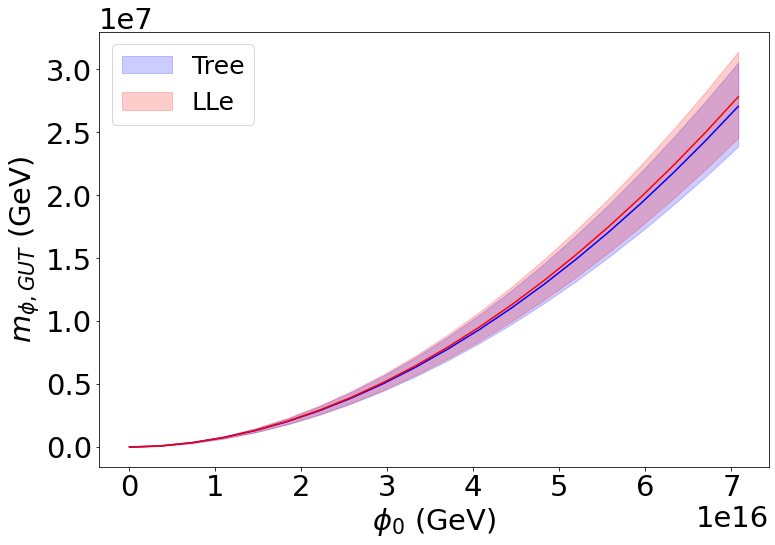

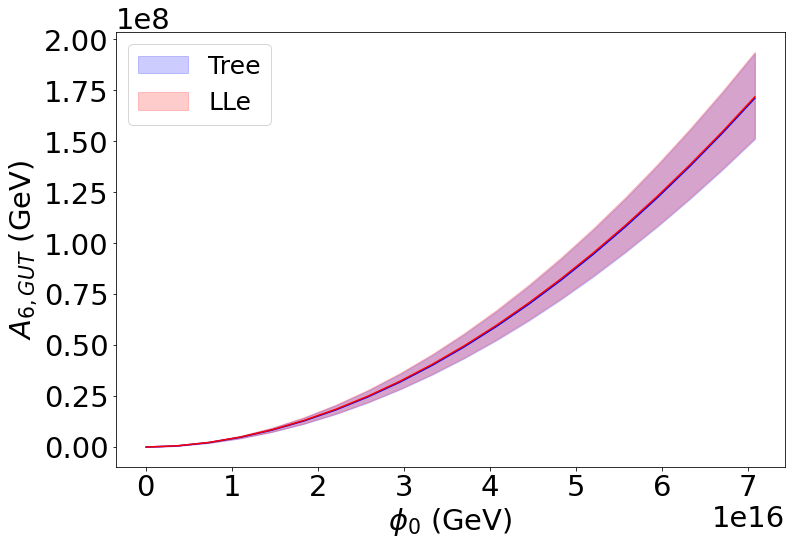

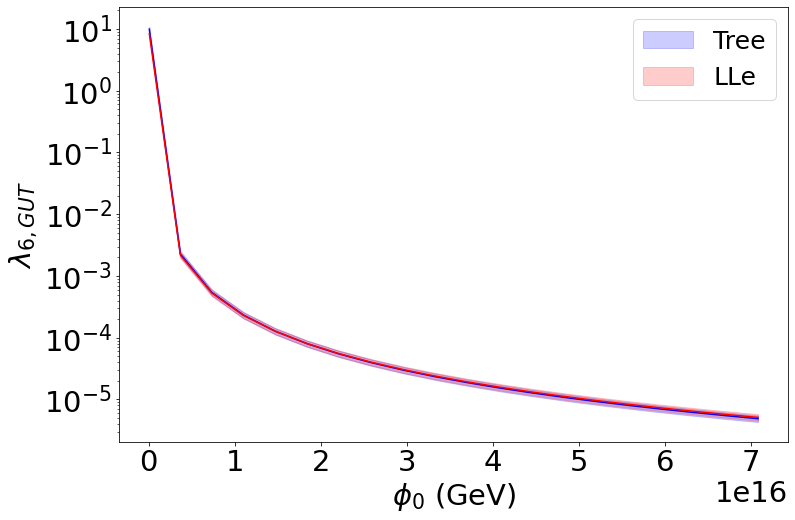

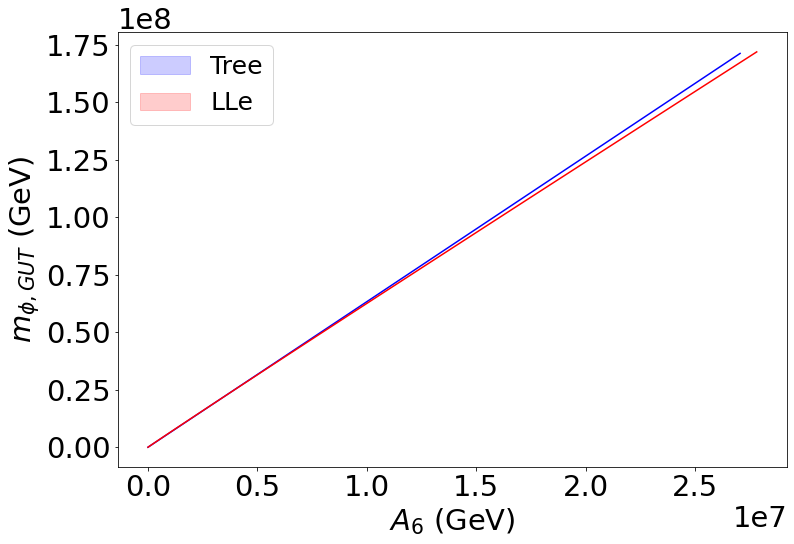

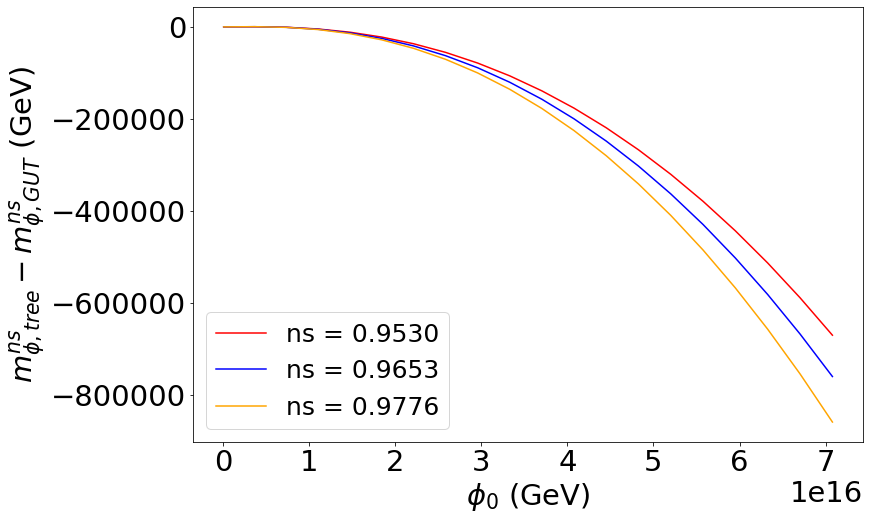

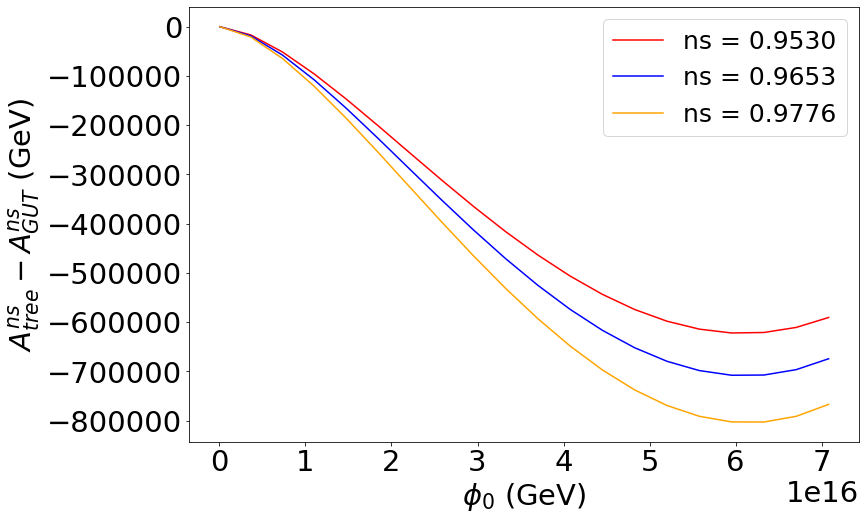

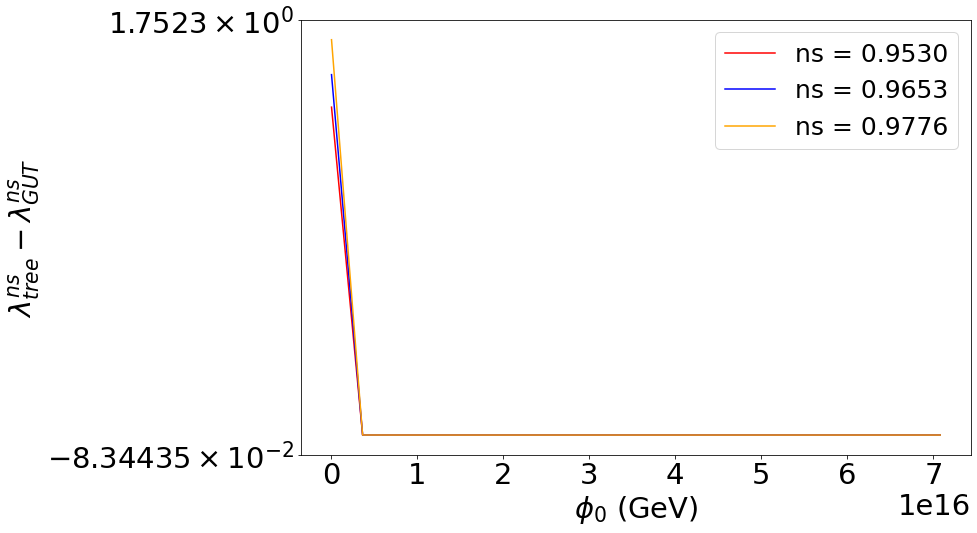

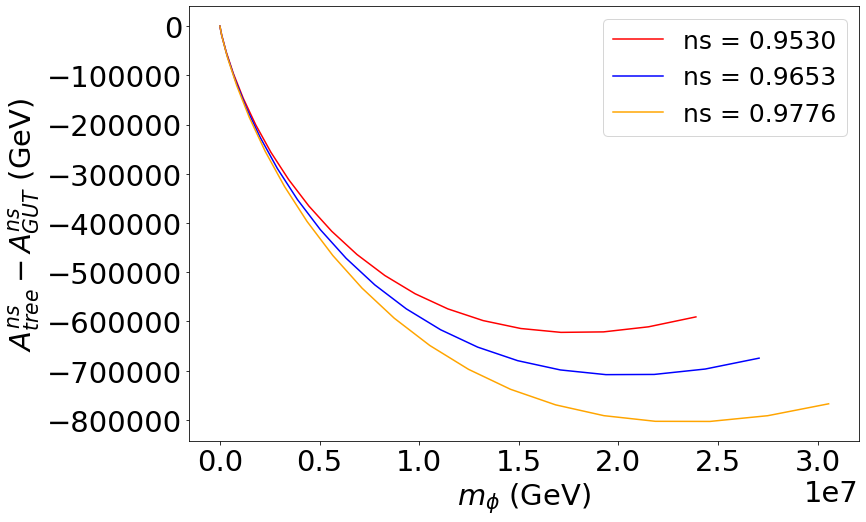

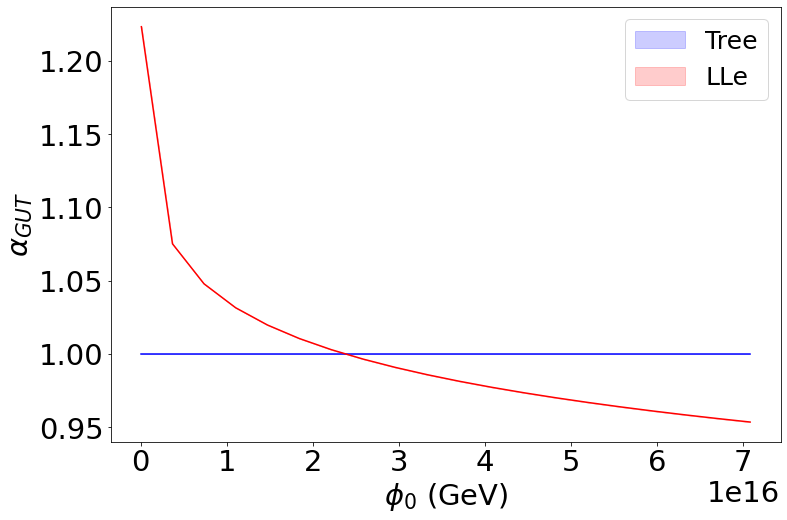

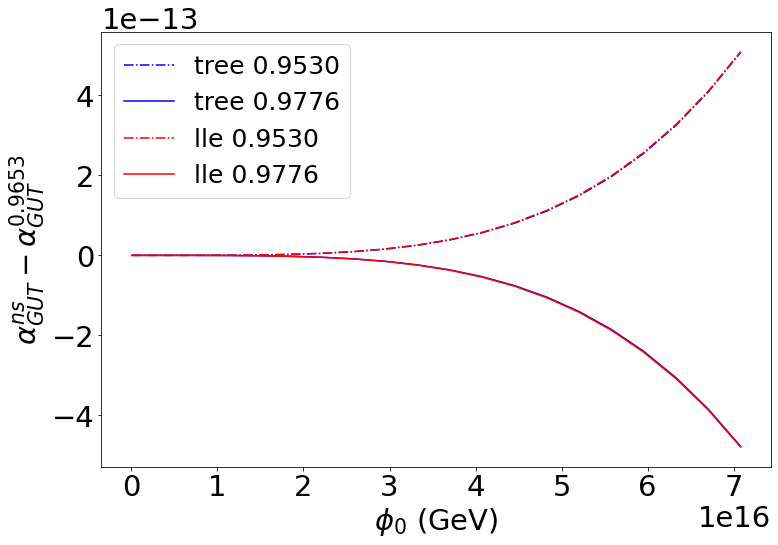

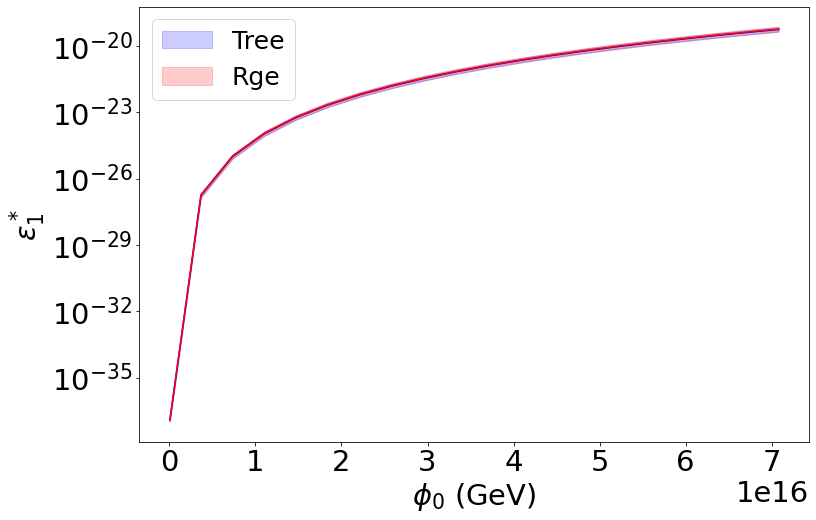

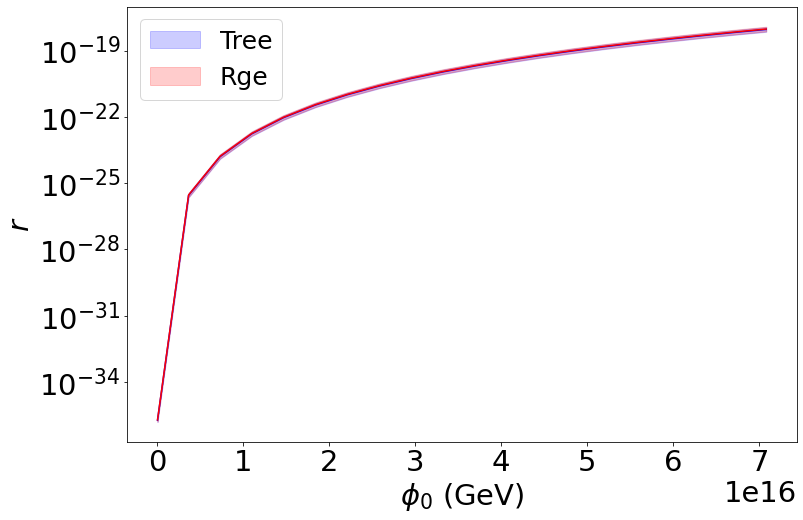

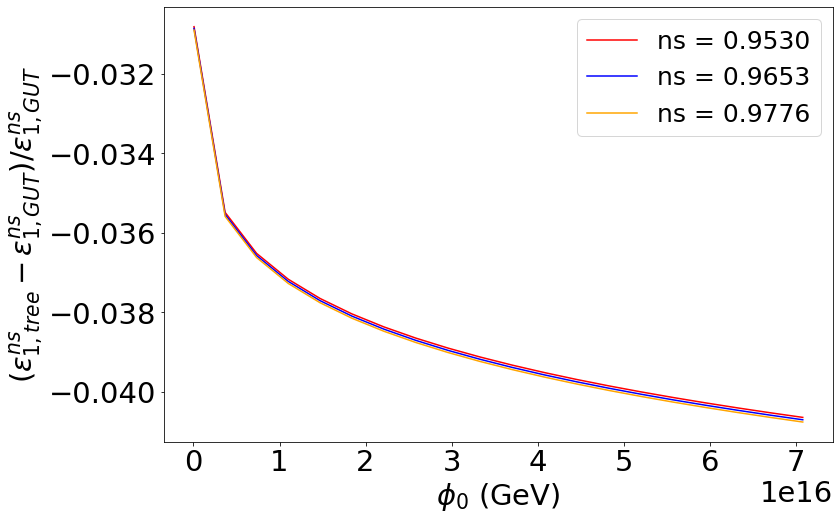

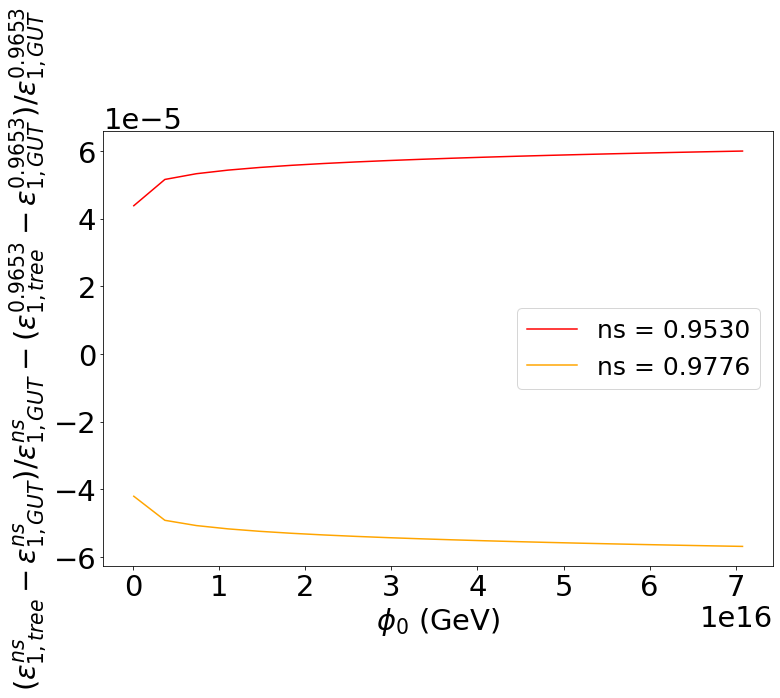

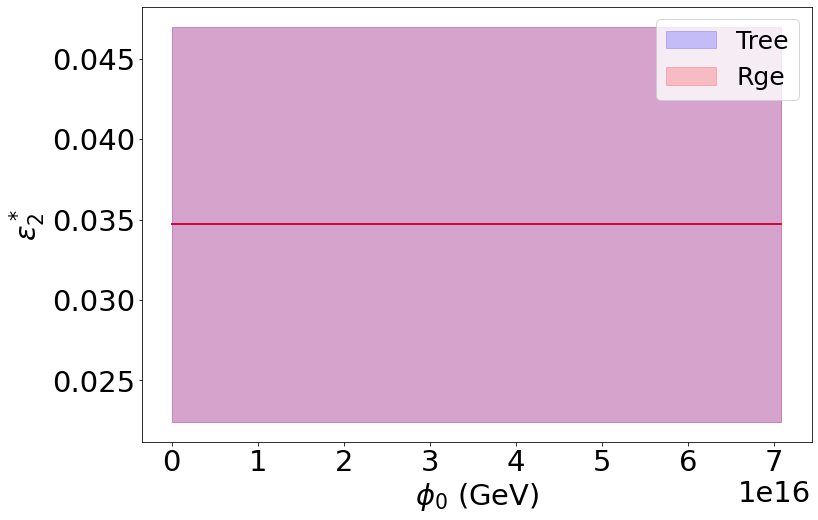

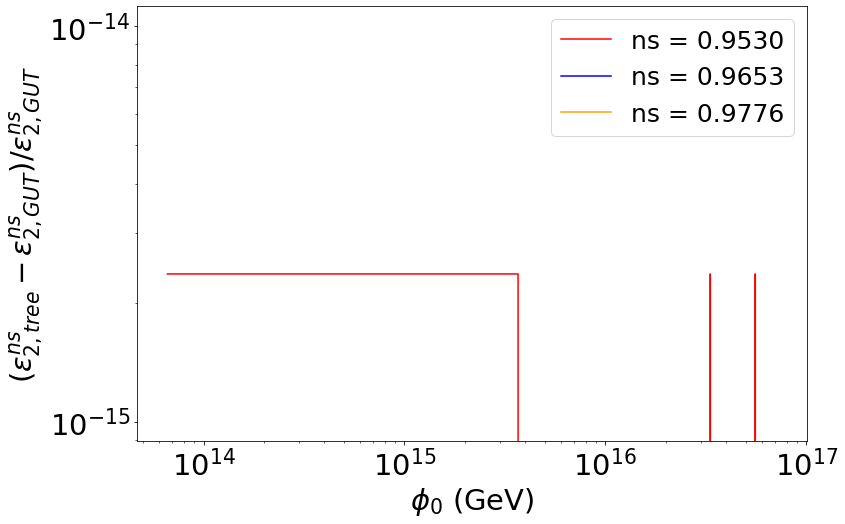

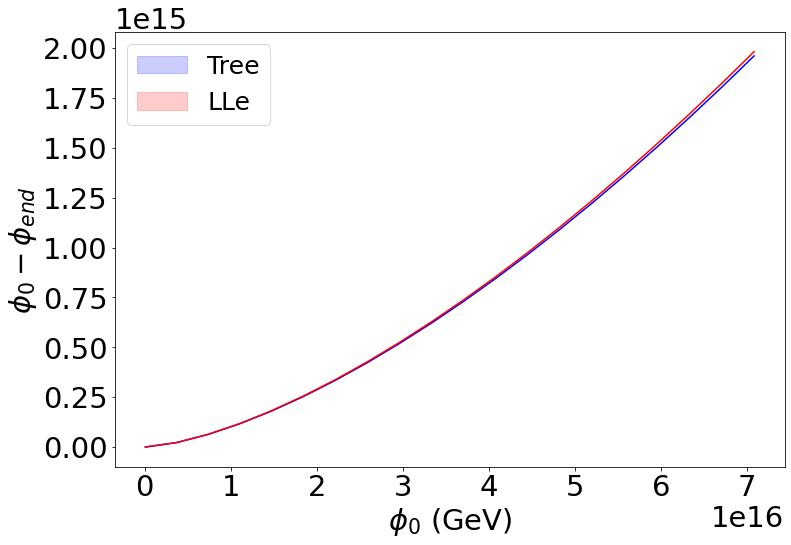

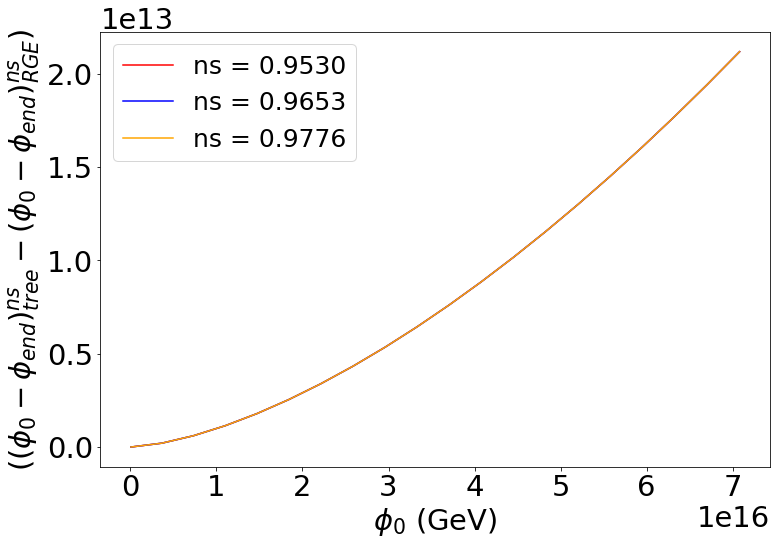

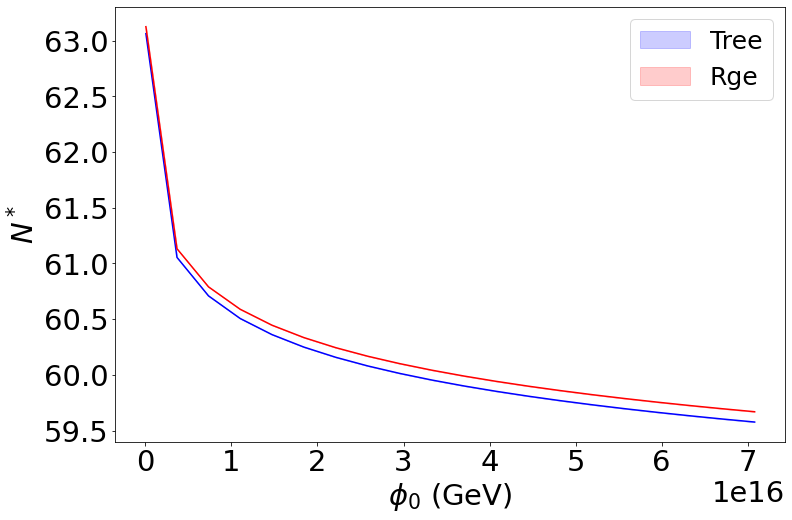

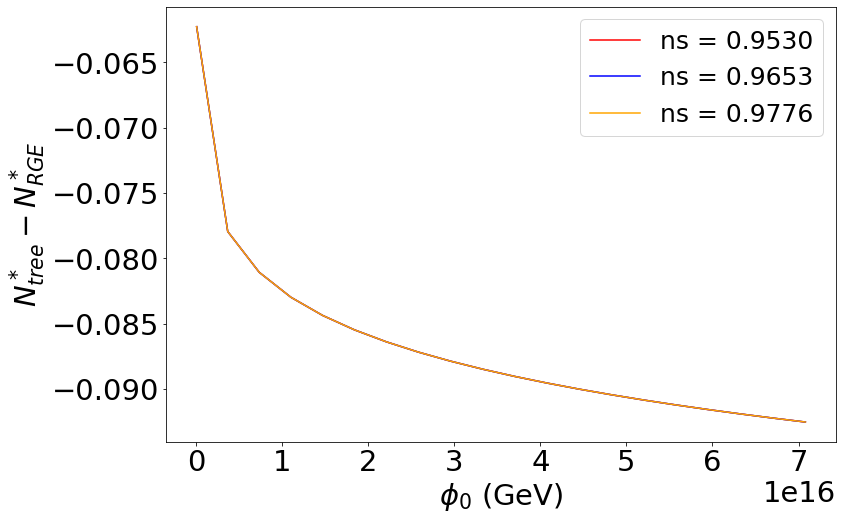

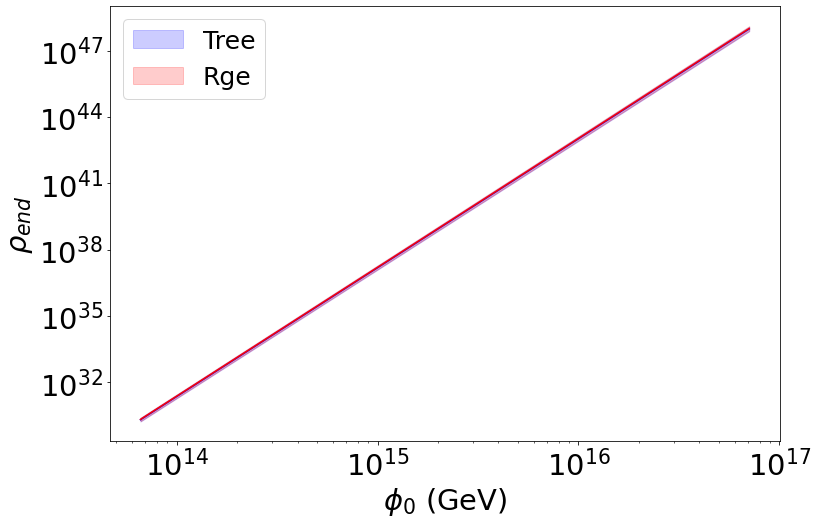

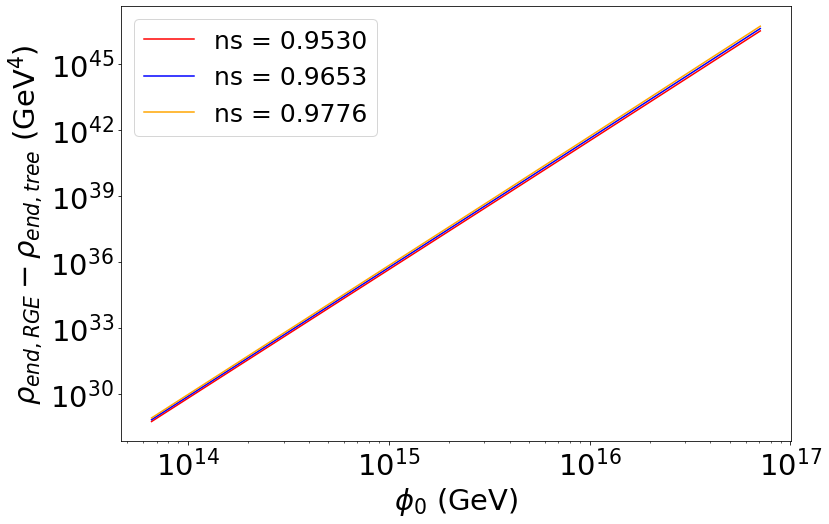

In [4]:
plt.figure(1)
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), pd_to_array(m0_Tree_lle_09653, 'mphi'),'blue')
plt.plot(pd_to_array(m0_lle_09653, 'phi0B'), pd_to_array(m0_lle_09653, 'mphi'),'red')
plt.fill_between(pd_to_array(m0_Tree_lle_09530, 'phi0B'), pd_to_array(m0_Tree_lle_09530, 'mphi'), pd_to_array(m0_Tree_lle_09776, 'mphi'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_lle_09530, 'phi0B'), pd_to_array(m0_lle_09530, 'mphi'), pd_to_array(m0_lle_09776, 'mphi'), color='red', alpha=0.2, label='LLe')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$m_{\phi,GUT}$ (GeV)')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(2)
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), pd_to_array(m0_Tree_lle_09653, 'A6'),'blue')
plt.plot(pd_to_array(m0_lle_09653, 'phi0B'), pd_to_array(m0_lle_09653, 'A6'),'red')
plt.fill_between(pd_to_array(m0_Tree_lle_09530, 'phi0B'), pd_to_array(m0_Tree_lle_09530, 'A6'), pd_to_array(m0_Tree_lle_09776, 'A6'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_lle_09530, 'phi0B'), pd_to_array(m0_lle_09530, 'A6'), pd_to_array(m0_lle_09776, 'A6'), color='red', alpha=0.2, label='LLe')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$A_{6,GUT}$ (GeV)')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(3)
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), pd_to_array(m0_Tree_lle_09653, 'lambda6'),'blue')
plt.plot(pd_to_array(m0_lle_09653, 'phi0B'), pd_to_array(m0_lle_09653, 'lambda6'),'red')
plt.fill_between(pd_to_array(m0_Tree_lle_09530, 'phi0B'), pd_to_array(m0_Tree_lle_09530, 'lambda6'), pd_to_array(m0_Tree_lle_09776, 'lambda6'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_lle_09530, 'phi0B'), pd_to_array(m0_lle_09530, 'lambda6'), pd_to_array(m0_lle_09776, 'lambda6'), color='red', alpha=0.2, label='LLe')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\lambda_{6,GUT}$')
plt.legend(fontsize=25)
plt.semilogy()
define_plot_resolution()

plt.figure(4)
plt.plot(pd_to_array(m0_Tree_lle_09653, 'mphi'), pd_to_array(m0_Tree_lle_09653, 'A6'),'blue')
plt.plot(pd_to_array(m0_lle_09653, 'mphi'), pd_to_array(m0_lle_09653, 'A6'),'red')
plt.fill_between([], [], [], color = 'blue', alpha=0.2, label='Tree')
plt.fill_between([], [], [], color='red', alpha=0.2, label='LLe')
plt.xlabel(r'$A_6$ (GeV)')
plt.ylabel(r'$m_{\phi,GUT}$ (GeV)')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(5)
plt.plot(pd_to_array(m0_Tree_lle_09530, 'phi0B'), pd_to_array(m0_Tree_lle_09530, 'mphi')-pd_to_array(m0_lle_09530, 'mphi'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), pd_to_array(m0_Tree_lle_09653, 'mphi')-pd_to_array(m0_lle_09653, 'mphi'),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_lle_09776, 'phi0B'), pd_to_array(m0_Tree_lle_09776, 'mphi')-pd_to_array(m0_lle_09776, 'mphi'),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$m_{\phi,tree}^{ns}-m_{\phi,GUT}^{ns}$ (GeV)')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(6)
plt.plot(pd_to_array(m0_Tree_lle_09530, 'phi0B'), pd_to_array(m0_Tree_lle_09530, 'A6')-pd_to_array(m0_lle_09530, 'A6'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), pd_to_array(m0_Tree_lle_09653, 'A6')-pd_to_array(m0_lle_09653, 'A6'),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_lle_09776, 'phi0B'), pd_to_array(m0_Tree_lle_09776, 'A6')-pd_to_array(m0_lle_09776, 'A6'),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$A_{tree}^{ns}-A_{GUT}^{ns}$ (GeV)')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(7)
plt.plot(pd_to_array(m0_Tree_lle_09530, 'phi0B'), pd_to_array(m0_Tree_lle_09530, 'lambda6')-pd_to_array(m0_lle_09530, 'lambda6'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), pd_to_array(m0_Tree_lle_09653, 'lambda6')-pd_to_array(m0_lle_09653, 'lambda6'),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_lle_09776, 'phi0B'), pd_to_array(m0_Tree_lle_09776, 'lambda6')-pd_to_array(m0_lle_09776, 'lambda6'),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\lambda_{tree}^{ns}-\lambda_{GUT}^{ns}$')
plt.legend(fontsize=25)
plt.yscale('symlog')
define_plot_resolution()

plt.figure(8)
plt.plot(pd_to_array(m0_Tree_lle_09530, 'mphi'), pd_to_array(m0_Tree_lle_09530, 'A6')-pd_to_array(m0_lle_09530, 'A6'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_lle_09653, 'mphi'), pd_to_array(m0_Tree_lle_09653, 'A6')-pd_to_array(m0_lle_09653, 'A6'),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_lle_09776, 'mphi'), pd_to_array(m0_Tree_lle_09776, 'A6')-pd_to_array(m0_lle_09776, 'A6'),'orange', label='ns = 0.9776')
plt.xlabel(r'$m_\phi$ (GeV)')
plt.ylabel(r'$A_{tree}^{ns}-A_{GUT}^{ns}$ (GeV)')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(9)
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), alpha(m0_Tree_lle_09653),'blue')
plt.plot(pd_to_array(m0_lle_09653, 'phi0B'), alpha(m0_lle_09653),'red')
plt.fill_between(pd_to_array(m0_Tree_lle_09530, 'phi0B'), alpha(m0_Tree_lle_09530), alpha(m0_Tree_lle_09776), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_lle_09530, 'phi0B'), alpha(m0_lle_09530), alpha(m0_lle_09776), color='red', alpha=0.2, label='LLe')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\alpha_{GUT}$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(10)
plt.plot(pd_to_array(m0_Tree_lle_09530, 'phi0B', dtype = 'mp'),alpha(m0_Tree_lle_09530, dtype = 'mp')-alpha(m0_Tree_lle_09653, dtype = 'mp'),label='tree 0.9530', color='blue', linestyle='-.')
plt.plot(pd_to_array(m0_Tree_lle_09530, 'phi0B', dtype = 'mp'),alpha(m0_Tree_lle_09776, dtype = 'mp')-alpha(m0_Tree_lle_09653, dtype = 'mp'),label='tree 0.9776', color='blue')
plt.plot(pd_to_array(m0_lle_09530, 'phi0B', dtype = 'mp'),alpha(m0_lle_09530, dtype = 'mp')-alpha(m0_lle_09653, dtype = 'mp'),label='lle 0.9530', color='red', linestyle='-.')
plt.plot(pd_to_array(m0_lle_09530, 'phi0B', dtype = 'mp'),alpha(m0_lle_09776, dtype = 'mp')-alpha(m0_lle_09653, dtype = 'mp'),label='lle 0.9776', color='red')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\alpha_{GUT}^{ns}-\alpha_{GUT}^{0.9653}$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(11)
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), pd_to_array(m0_Tree_lle_09653, 'r')/16,'blue')
plt.plot(pd_to_array(m0_lle_09653, 'phi0B'), pd_to_array(m0_lle_09653, 'r')/16,'red')
plt.fill_between(pd_to_array(m0_Tree_lle_09530, 'phi0B'), pd_to_array(m0_Tree_lle_09530, 'r')/16, pd_to_array(m0_Tree_lle_09776, 'r')/16, color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_lle_09530, 'phi0B'), pd_to_array(m0_lle_09530, 'r')/16, pd_to_array(m0_lle_09776, 'r')/16, color='red', alpha=0.2, label='Rge')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\epsilon_1^*$')
plt.legend(fontsize=25)
plt.semilogy()
define_plot_resolution()

plt.figure(12)
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), pd_to_array(m0_Tree_lle_09653, 'r'),'blue')
plt.plot(pd_to_array(m0_lle_09653, 'phi0B'), pd_to_array(m0_lle_09653, 'r'),'red')
plt.fill_between(pd_to_array(m0_Tree_lle_09530, 'phi0B'), pd_to_array(m0_Tree_lle_09530, 'r'), pd_to_array(m0_Tree_lle_09776, 'r'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_lle_09530, 'phi0B'), pd_to_array(m0_lle_09530, 'r'), pd_to_array(m0_lle_09776, 'r'), color='red', alpha=0.2, label='Rge')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$r$')
plt.legend(fontsize=25)
plt.semilogy()
define_plot_resolution()

plt.figure(13)
plt.plot(pd_to_array(m0_Tree_lle_09530, 'phi0B'), (pd_to_array(m0_Tree_lle_09530, 'r')-pd_to_array(m0_lle_09530, 'r'))/pd_to_array(m0_lle_09530, 'r'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), (pd_to_array(m0_Tree_lle_09653, 'r')-pd_to_array(m0_lle_09653, 'r'))/pd_to_array(m0_lle_09653, 'r'),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_lle_09776, 'phi0B'), (pd_to_array(m0_Tree_lle_09776, 'r')-pd_to_array(m0_lle_09776, 'r'))/pd_to_array(m0_lle_09776, 'r'),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$(\epsilon_{1,tree}^{ns}-\epsilon_{1,GUT}^{ns})/\epsilon_{1,GUT}^{ns}$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(14)
plt.plot(pd_to_array(m0_Tree_lle_09530, 'phi0B'), (pd_to_array(m0_Tree_lle_09530, 'r')-pd_to_array(m0_lle_09530, 'r'))/pd_to_array(m0_lle_09530, 'r')-(pd_to_array(m0_Tree_lle_09653, 'r')-pd_to_array(m0_lle_09653, 'r'))/pd_to_array(m0_lle_09653, 'r'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_lle_09776, 'phi0B'), (pd_to_array(m0_Tree_lle_09776, 'r')-pd_to_array(m0_lle_09776, 'r'))/pd_to_array(m0_lle_09776, 'r')-(pd_to_array(m0_Tree_lle_09653, 'r')-pd_to_array(m0_lle_09653, 'r'))/pd_to_array(m0_lle_09653, 'r'),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$(\epsilon_{1,tree}^{ns}-\epsilon_{1,GUT}^{ns})/\epsilon_{1,GUT}^{ns}-(\epsilon_{1,tree}^{0.9653}-\epsilon_{1,GUT}^{0.9653})/\epsilon_{1,GUT}^{0.9653}$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(15)
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), 1-pd_to_array(m0_Tree_lle_09653, 'ns'),'blue')
plt.plot(pd_to_array(m0_lle_09653, 'phi0B'), 1-pd_to_array(m0_lle_09653, 'ns'),'red')
plt.fill_between(pd_to_array(m0_Tree_lle_09530, 'phi0B'), 1-pd_to_array(m0_Tree_lle_09530, 'ns'), 1-pd_to_array(m0_Tree_lle_09776, 'ns'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_lle_09530, 'phi0B'), 1-pd_to_array(m0_lle_09530, 'ns'), 1-pd_to_array(m0_lle_09776, 'ns'), color='red', alpha=0.2, label='Rge')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\epsilon_2^*$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(16)
plt.plot(pd_to_array(m0_Tree_lle_09530, 'phi0B'), (pd_to_array(m0_Tree_lle_09530, 'ns')-pd_to_array(m0_lle_09530, 'ns'))/(pd_to_array(m0_lle_09530, 'ns')-1),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), (pd_to_array(m0_Tree_lle_09653, 'ns')-pd_to_array(m0_lle_09653, 'ns'))/(pd_to_array(m0_lle_09653, 'ns')-1),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_lle_09776, 'phi0B'), (pd_to_array(m0_Tree_lle_09776, 'ns')-pd_to_array(m0_lle_09776, 'ns'))/(pd_to_array(m0_lle_09776, 'ns')-1),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$(\epsilon_{2,tree}^{ns}-\epsilon_{2,GUT}^{ns})/\epsilon_{2,GUT}^{ns}$')
plt.legend(fontsize=25)
plt.loglog()
define_plot_resolution()
  
plt.figure(17)
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), pd_to_array(m0_Tree_lle_09653, 'phi0B')-phi_end(m0_Tree_lle_09653, 'tree'),'blue')
plt.plot(pd_to_array(m0_lle_09653, 'phi0B'), pd_to_array(m0_lle_09653, 'phi0B')-phi_end(m0_lle_09653, 'lle'),'red')
plt.fill_between([], [], [], color = 'blue', alpha=0.2, label='Tree')
plt.fill_between([], [], [], color='red', alpha=0.2, label='LLe')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\phi_0-\phi_{end}$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(18)
plt.plot(pd_to_array(m0_Tree_lle_09530, 'phi0B'), phi_end(m0_Tree_lle_09530, 'tree')-phi_end(m0_lle_09530, 'lle'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), phi_end(m0_Tree_lle_09653, 'tree')-phi_end(m0_lle_09653, 'lle'),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_lle_09776, 'phi0B'), phi_end(m0_Tree_lle_09776, 'tree')-phi_end(m0_lle_09776, 'lle'),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$((\phi_0-\phi_{end})_{tree}^{ns}-(\phi_0-\phi_{end})_{RGE}^{ns})$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(19)
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), Nstar(m0_Tree_lle_09653,'tree'),'blue')
plt.plot(pd_to_array(m0_lle_09653, 'phi0B'), Nstar(m0_lle_09653,'lle'),'red')
plt.fill_between(pd_to_array(m0_Tree_lle_09653, 'phi0B'), Nstar(m0_Tree_lle_09530,'tree'), Nstar(m0_Tree_lle_09776,'tree'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_Tree_lle_09653, 'phi0B'), Nstar(m0_lle_09530,'lle'), Nstar(m0_lle_09776,'lle'), color='red', alpha=0.2, label='Rge')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$N^*$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(20)
plt.plot(pd_to_array(m0_Tree_lle_09530, 'phi0B'), Nstar(m0_Tree_lle_09530,'tree')-Nstar(m0_lle_09530,'lle') ,'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), Nstar(m0_Tree_lle_09653,'tree')-Nstar(m0_lle_09653,'lle') ,'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_lle_09776, 'phi0B'), Nstar(m0_Tree_lle_09776,'tree')-Nstar(m0_lle_09776,'lle') ,'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$N^*_{tree}-N^*_{RGE}$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(21)
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), rhoend(m0_Tree_lle_09653,'tree'),'blue')
plt.plot(pd_to_array(m0_lle_09653, 'phi0B'), rhoend(m0_lle_09653,'lle'),'red')
plt.fill_between(pd_to_array(m0_Tree_lle_09653, 'phi0B'), rhoend(m0_Tree_lle_09530,'tree'), rhoend(m0_Tree_lle_09776,'tree'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_Tree_lle_09653, 'phi0B'), rhoend(m0_lle_09530,'lle'), rhoend(m0_lle_09776,'lle'), color='red', alpha=0.2, label='Rge')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\rho_{end}$')
plt.legend(fontsize=25)
plt.loglog()
define_plot_resolution()

plt.figure(22)
plt.plot(pd_to_array(m0_Tree_lle_09530, 'phi0B'), -rhoend(m0_Tree_lle_09530,'tree')+rhoend(m0_lle_09530,'lle') ,'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_lle_09653, 'phi0B'), -rhoend(m0_Tree_lle_09653,'tree')+rhoend(m0_lle_09653,'lle') ,'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_lle_09776, 'phi0B'), -rhoend(m0_Tree_lle_09776,'tree')+rhoend(m0_lle_09776,'lle') ,'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\rho_{end,RGE}-\rho_{end,tree}$ (GeV$^4$)')
plt.legend(fontsize=25)
plt.loglog()
define_plot_resolution()

<ipython-input-5-f816d3d2e4f2>:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(21)


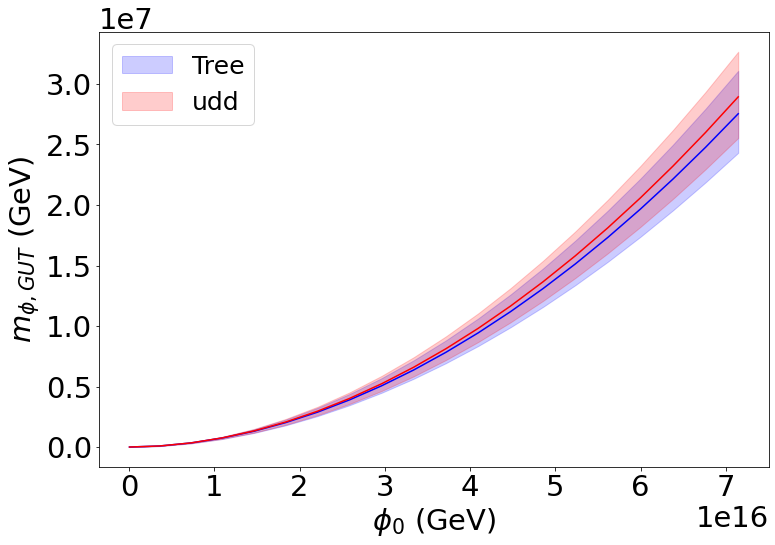

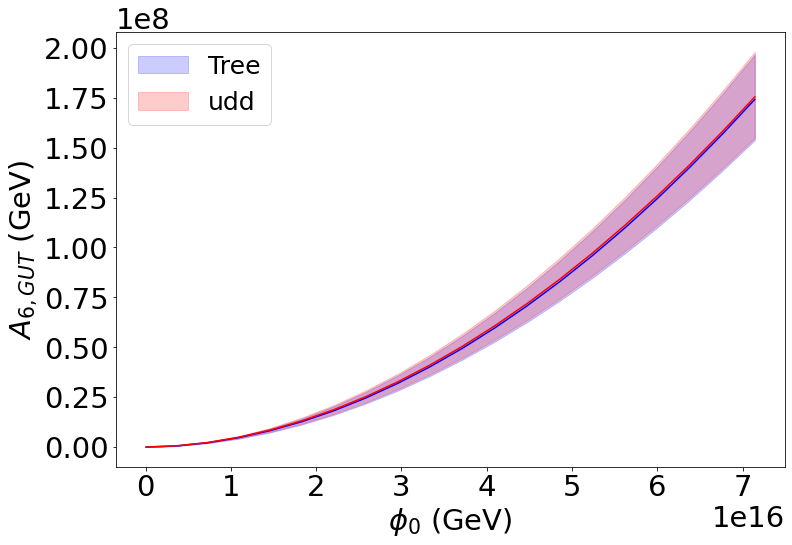

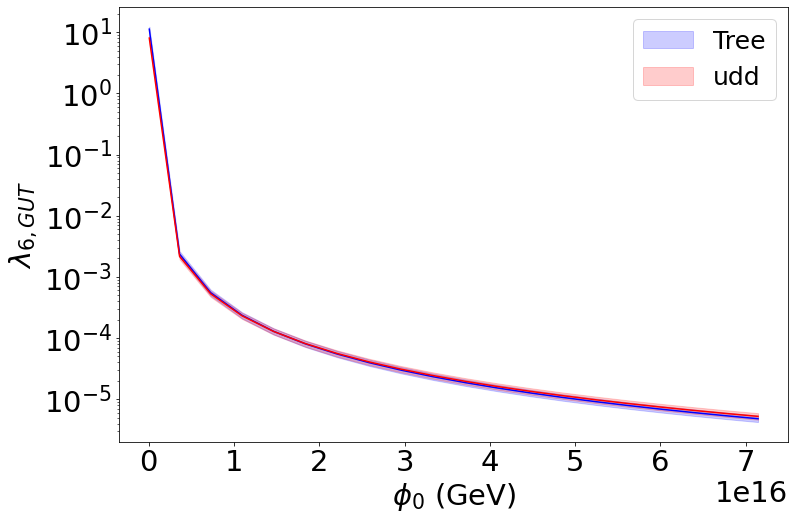

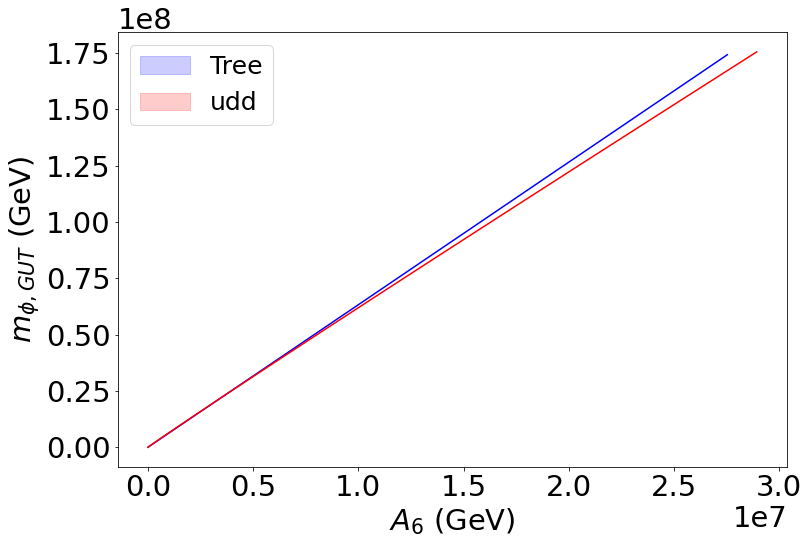

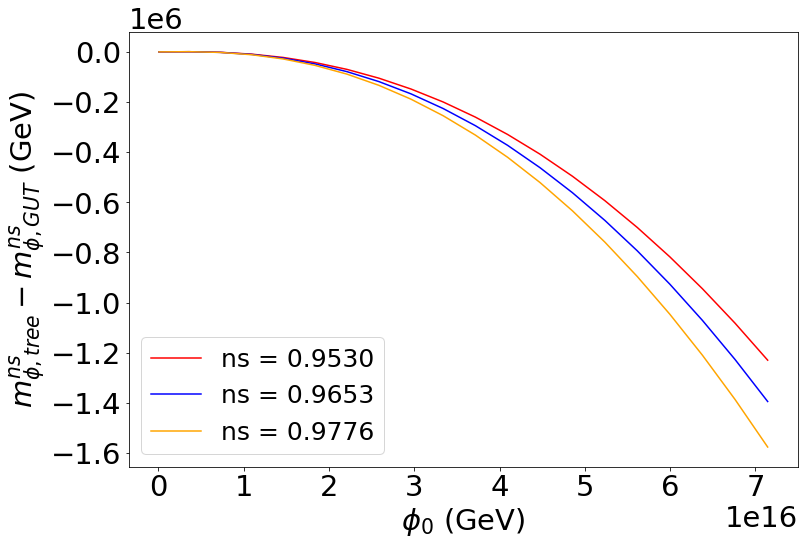

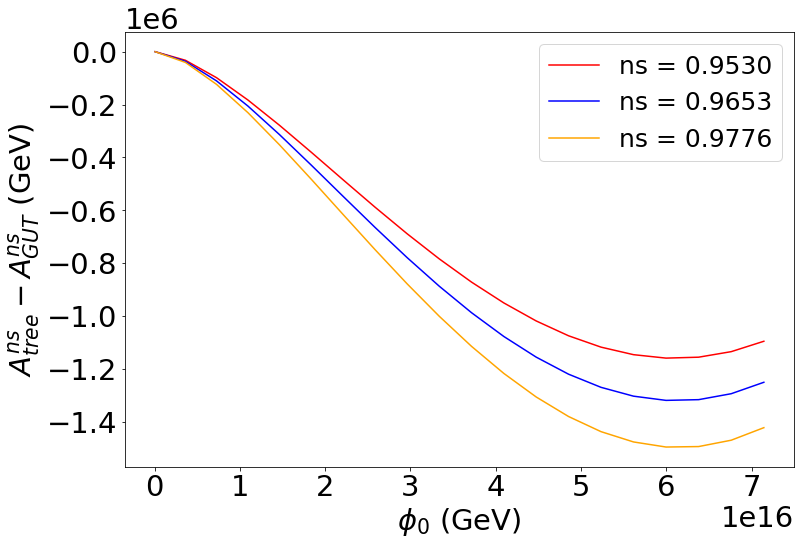

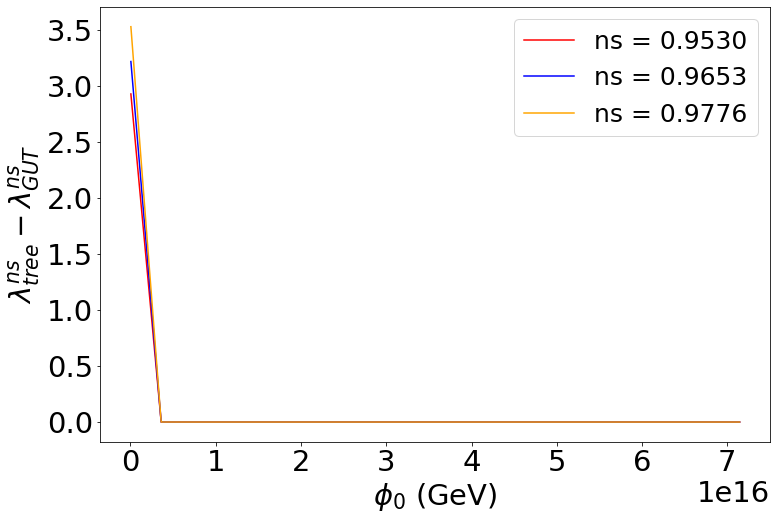

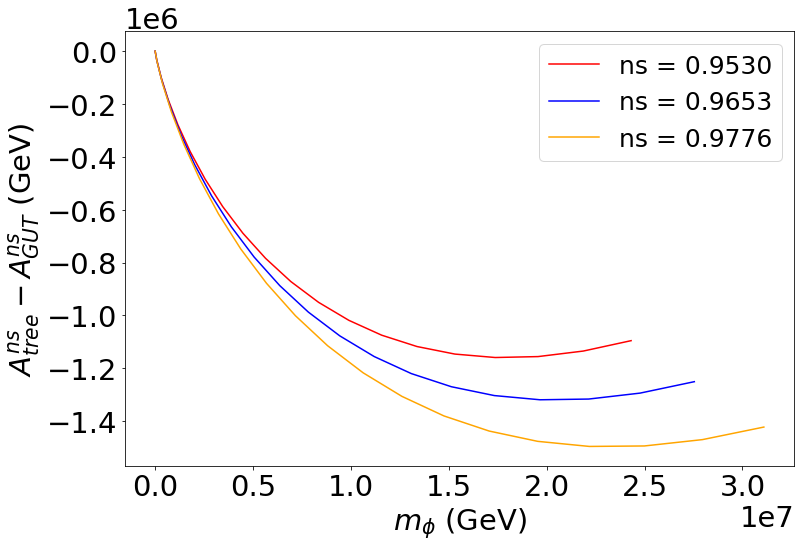

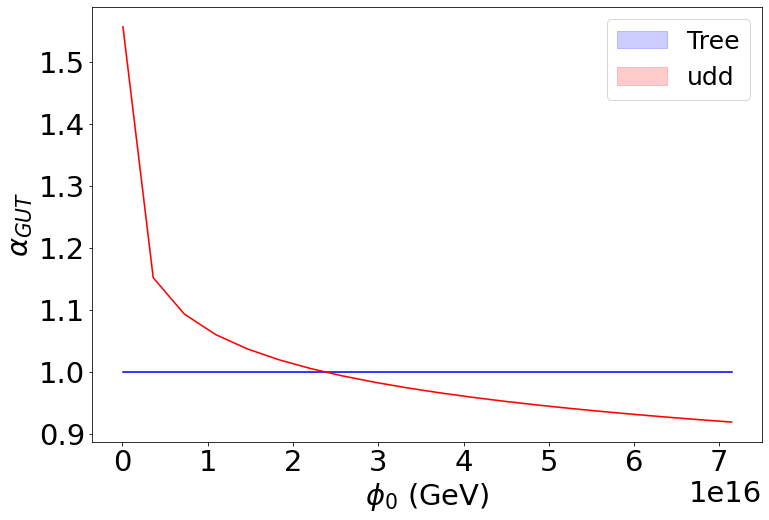

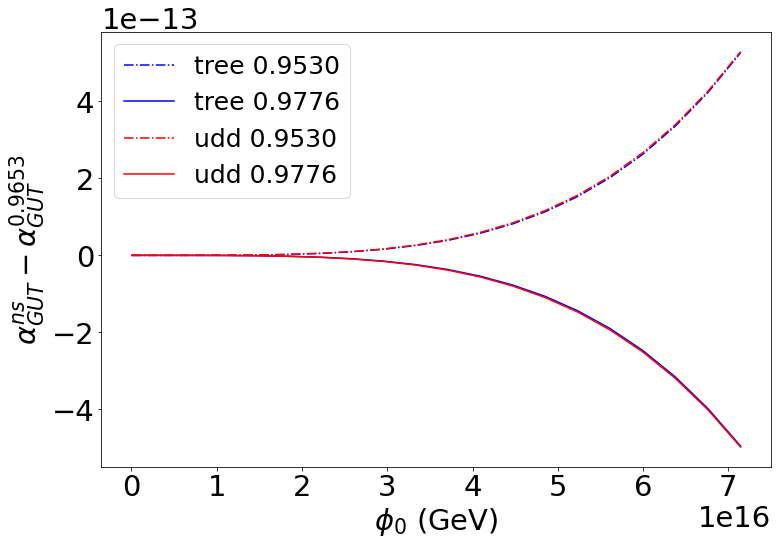

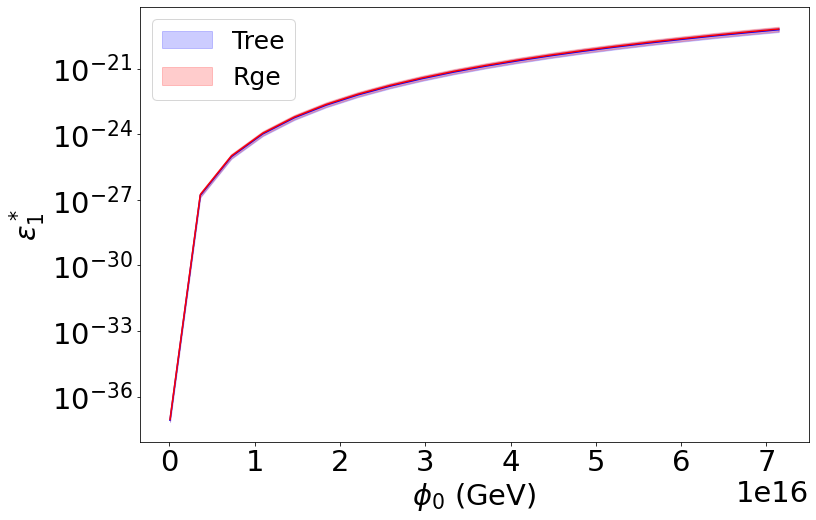

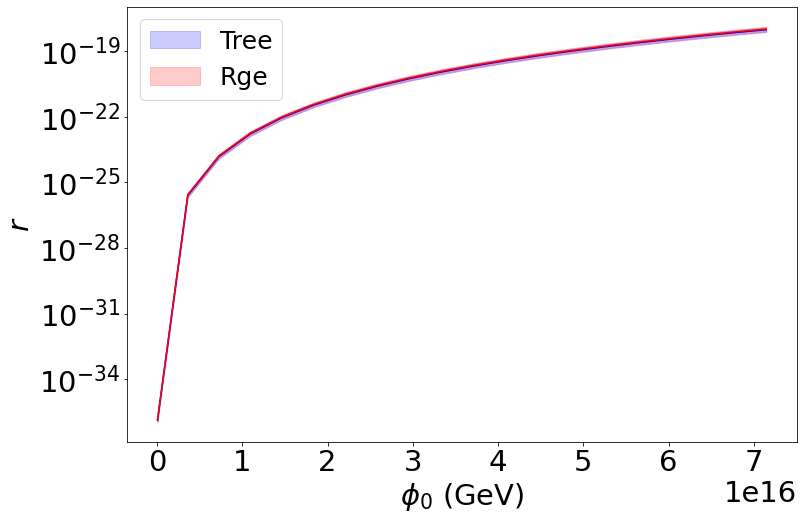

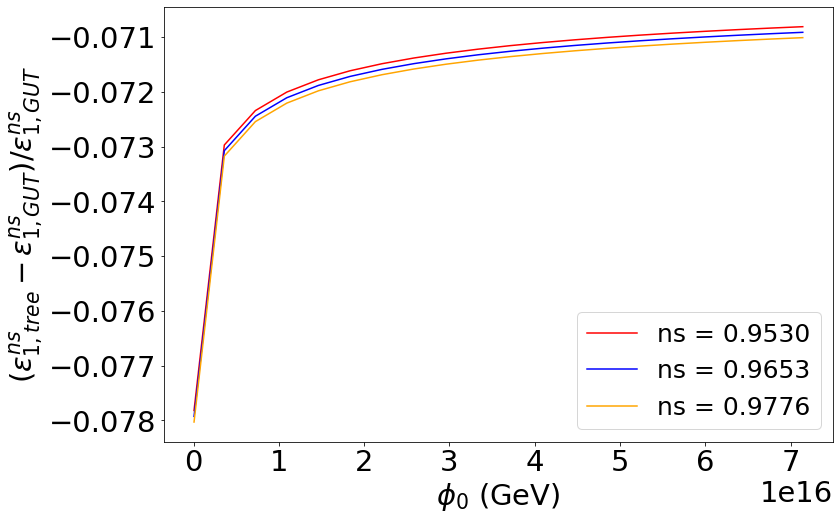

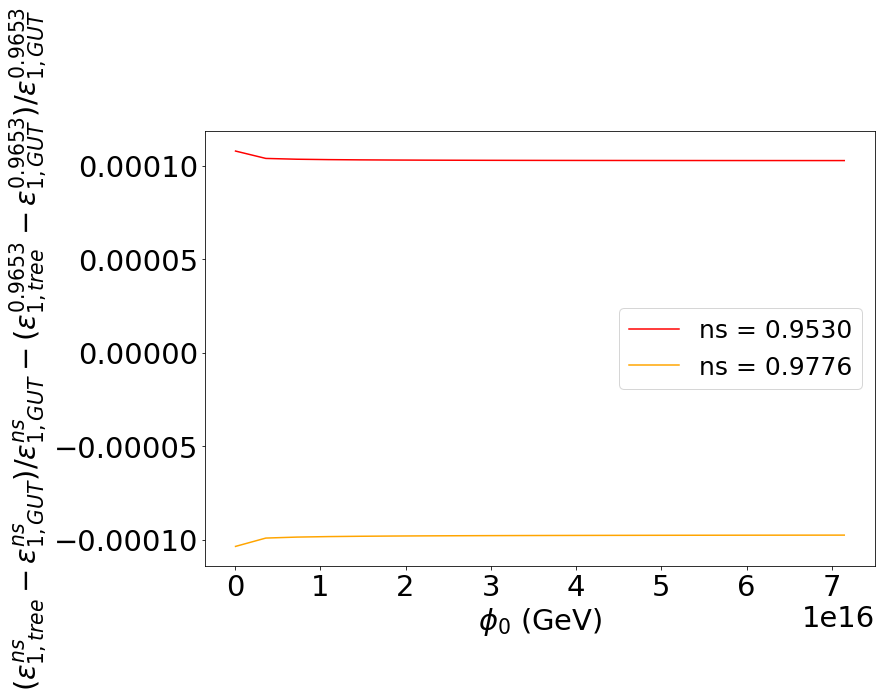

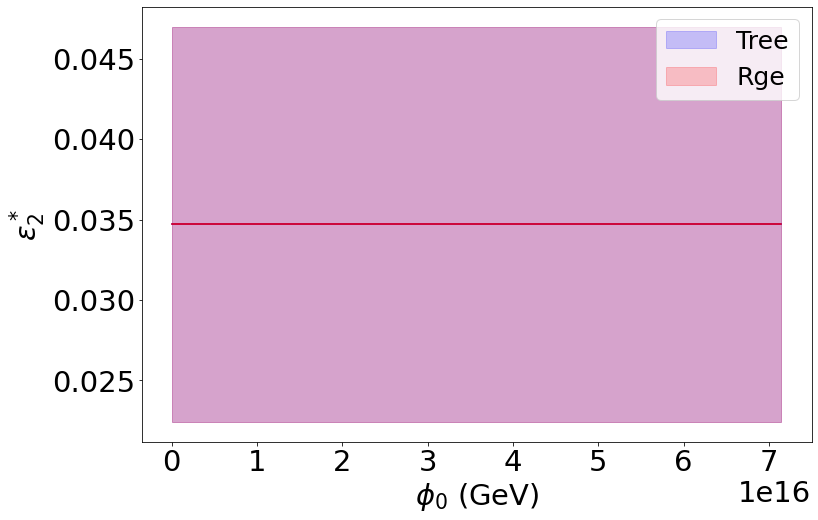

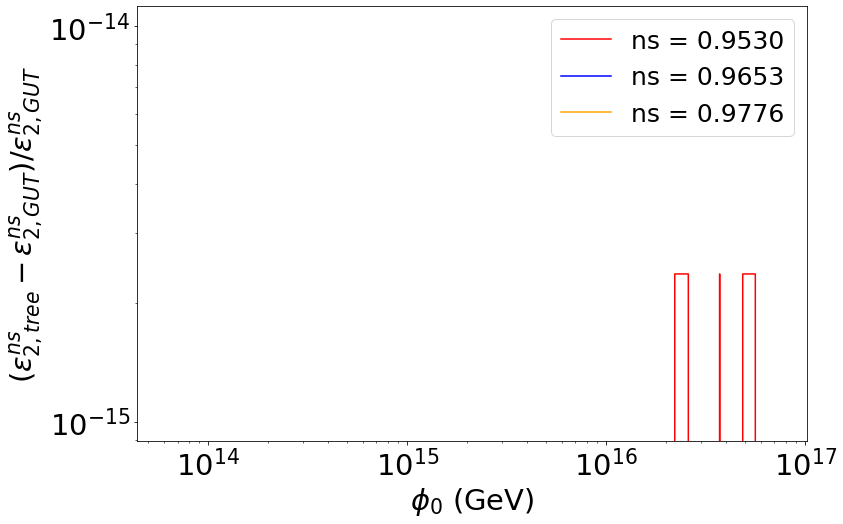

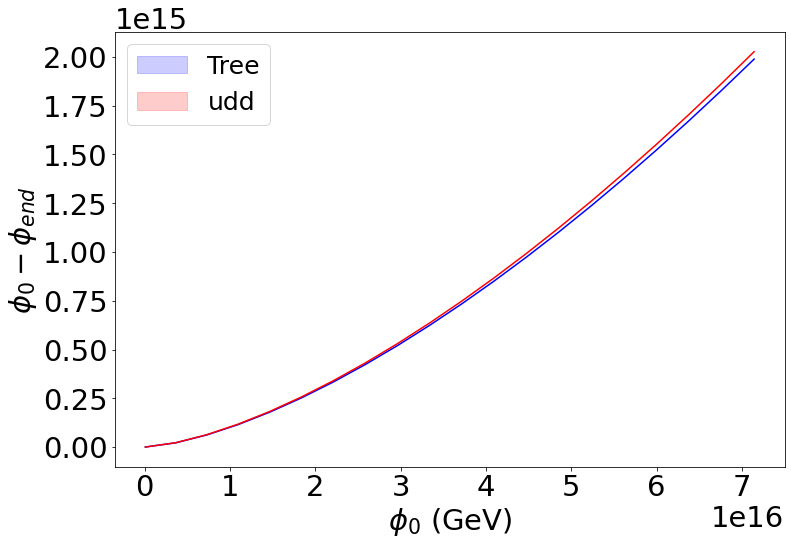

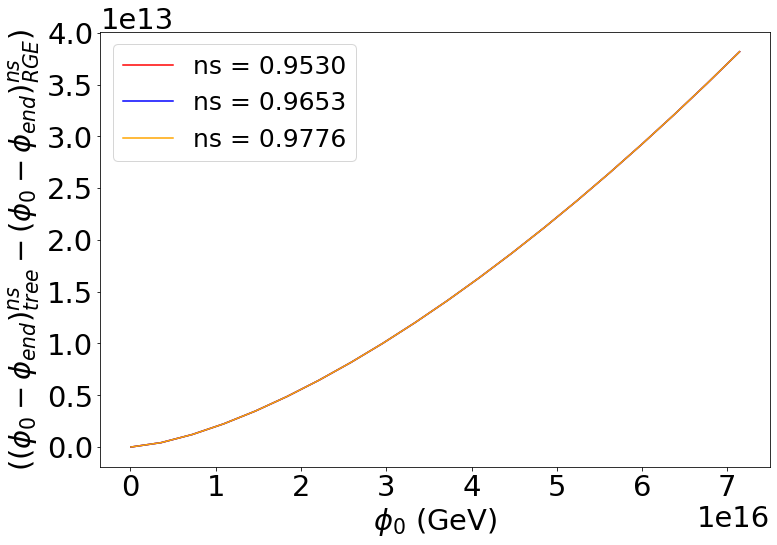

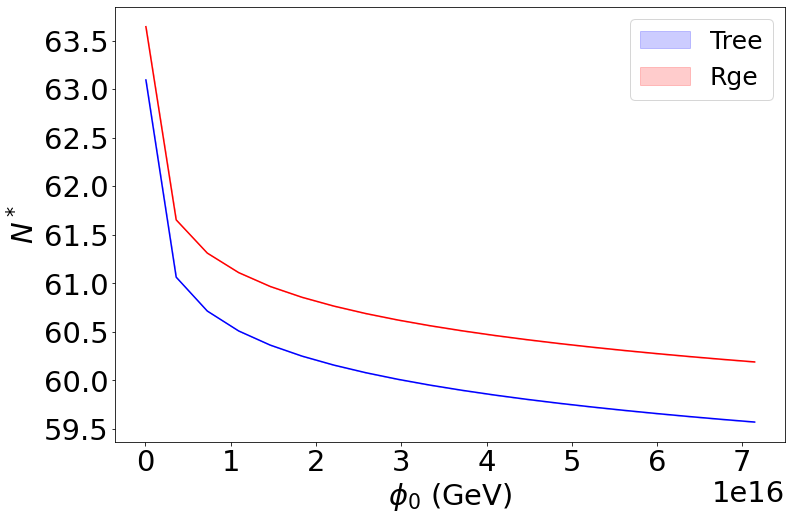

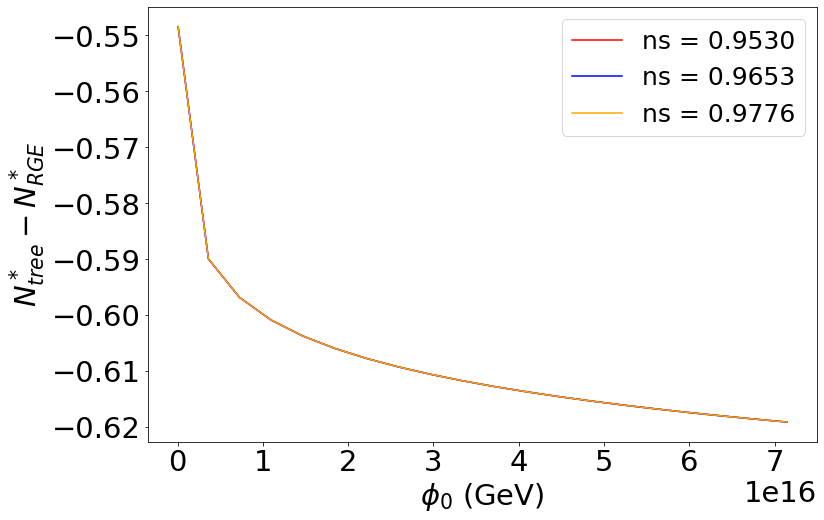

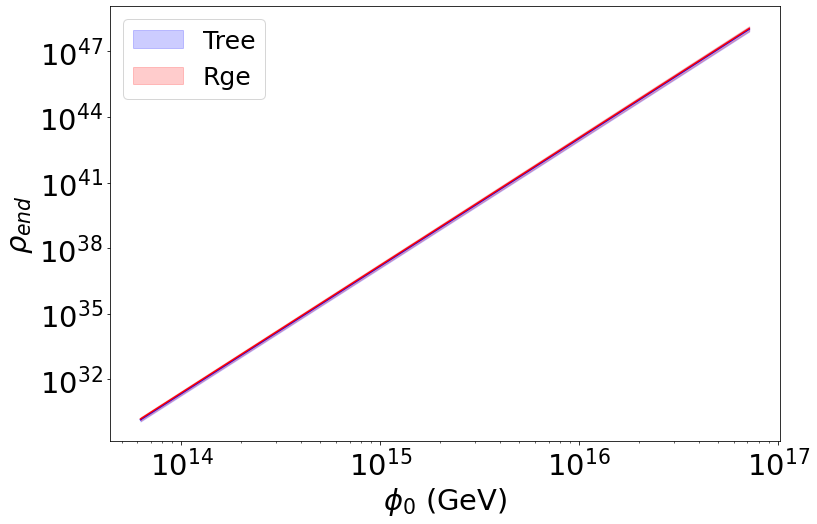

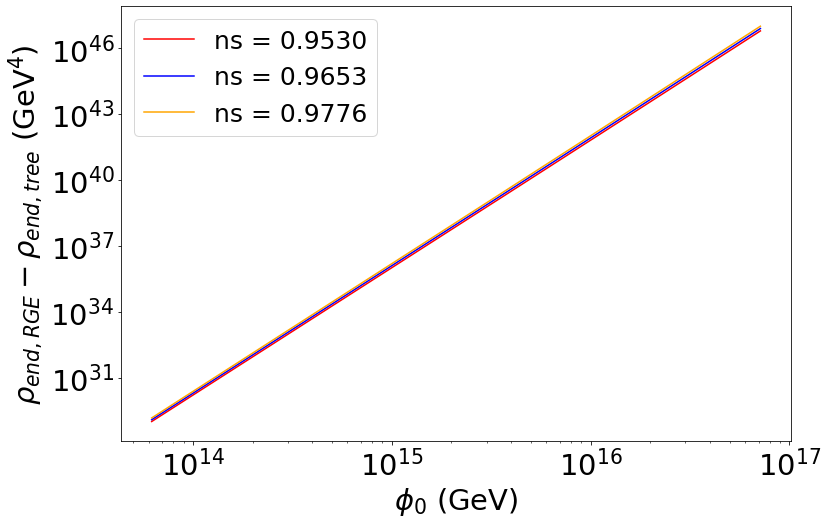

In [5]:
plt.figure(1)
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), pd_to_array(m0_Tree_udd_09653, 'mphi'),'blue')
plt.plot(pd_to_array(m0_udd_09653, 'phi0B'), pd_to_array(m0_udd_09653, 'mphi'),'red')
plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'mphi'), pd_to_array(m0_Tree_udd_09776, 'mphi'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_udd_09530, 'phi0B'), pd_to_array(m0_udd_09530, 'mphi'), pd_to_array(m0_udd_09776, 'mphi'), color='red', alpha=0.2, label='udd')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$m_{\phi,GUT}$ (GeV)')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(2)
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), pd_to_array(m0_Tree_udd_09653, 'A6'),'blue')
plt.plot(pd_to_array(m0_udd_09653, 'phi0B'), pd_to_array(m0_udd_09653, 'A6'),'red')
plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'A6'), pd_to_array(m0_Tree_udd_09776, 'A6'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_udd_09530, 'phi0B'), pd_to_array(m0_udd_09530, 'A6'), pd_to_array(m0_udd_09776, 'A6'), color='red', alpha=0.2, label='udd')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$A_{6,GUT}$ (GeV)')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(3)
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), pd_to_array(m0_Tree_udd_09653, 'lambda6'),'blue')
plt.plot(pd_to_array(m0_udd_09653, 'phi0B'), pd_to_array(m0_udd_09653, 'lambda6'),'red')
plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'lambda6'), pd_to_array(m0_Tree_udd_09776, 'lambda6'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_udd_09530, 'phi0B'), pd_to_array(m0_udd_09530, 'lambda6'), pd_to_array(m0_udd_09776, 'lambda6'), color='red', alpha=0.2, label='udd')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\lambda_{6,GUT}$')
plt.legend(fontsize=25)
plt.semilogy()
define_plot_resolution()

plt.figure(4)
plt.plot(pd_to_array(m0_Tree_udd_09653, 'mphi'), pd_to_array(m0_Tree_udd_09653, 'A6'),'blue')
plt.plot(pd_to_array(m0_udd_09653, 'mphi'), pd_to_array(m0_udd_09653, 'A6'),'red')
plt.fill_between([], [], [], color = 'blue', alpha=0.2, label='Tree')
plt.fill_between([], [], [], color='red', alpha=0.2, label='udd')
plt.xlabel(r'$A_6$ (GeV)')
plt.ylabel(r'$m_{\phi,GUT}$ (GeV)')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(5)
plt.plot(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'mphi')-pd_to_array(m0_udd_09530, 'mphi'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), pd_to_array(m0_Tree_udd_09653, 'mphi')-pd_to_array(m0_udd_09653, 'mphi'),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_udd_09776, 'phi0B'), pd_to_array(m0_Tree_udd_09776, 'mphi')-pd_to_array(m0_udd_09776, 'mphi'),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$m_{\phi,tree}^{ns}-m_{\phi,GUT}^{ns}$ (GeV)')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(6)
plt.plot(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'A6')-pd_to_array(m0_udd_09530, 'A6'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), pd_to_array(m0_Tree_udd_09653, 'A6')-pd_to_array(m0_udd_09653, 'A6'),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_udd_09776, 'phi0B'), pd_to_array(m0_Tree_udd_09776, 'A6')-pd_to_array(m0_udd_09776, 'A6'),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$A_{tree}^{ns}-A_{GUT}^{ns}$ (GeV)')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(7)
plt.plot(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'lambda6')-pd_to_array(m0_udd_09530, 'lambda6'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), pd_to_array(m0_Tree_udd_09653, 'lambda6')-pd_to_array(m0_udd_09653, 'lambda6'),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_udd_09776, 'phi0B'), pd_to_array(m0_Tree_udd_09776, 'lambda6')-pd_to_array(m0_udd_09776, 'lambda6'),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\lambda_{tree}^{ns}-\lambda_{GUT}^{ns}$')
plt.legend(fontsize=25)
# plt.semilogy()
define_plot_resolution()

plt.figure(8)
plt.plot(pd_to_array(m0_Tree_udd_09530, 'mphi'), pd_to_array(m0_Tree_udd_09530, 'A6')-pd_to_array(m0_udd_09530, 'A6'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_udd_09653, 'mphi'), pd_to_array(m0_Tree_udd_09653, 'A6')-pd_to_array(m0_udd_09653, 'A6'),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_udd_09776, 'mphi'), pd_to_array(m0_Tree_udd_09776, 'A6')-pd_to_array(m0_udd_09776, 'A6'),'orange', label='ns = 0.9776')
plt.xlabel(r'$m_\phi$ (GeV)')
plt.ylabel(r'$A_{tree}^{ns}-A_{GUT}^{ns}$ (GeV)')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(9)
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), alpha(m0_Tree_udd_09653),'blue')
plt.plot(pd_to_array(m0_udd_09653, 'phi0B'), alpha(m0_udd_09653),'red')
plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), alpha(m0_Tree_udd_09530), alpha(m0_Tree_udd_09776), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_udd_09530, 'phi0B'), alpha(m0_udd_09530), alpha(m0_udd_09776), color='red', alpha=0.2, label='udd')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\alpha_{GUT}$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(10)
plt.plot(pd_to_array(m0_Tree_udd_09530, 'phi0B', dtype = 'mp'),alpha(m0_Tree_udd_09530, dtype = 'mp')-alpha(m0_Tree_udd_09653, dtype = 'mp'),label='tree 0.9530', color='blue', linestyle='-.')
plt.plot(pd_to_array(m0_Tree_udd_09530, 'phi0B', dtype = 'mp'),alpha(m0_Tree_udd_09776, dtype = 'mp')-alpha(m0_Tree_udd_09653, dtype = 'mp'),label='tree 0.9776', color='blue')
plt.plot(pd_to_array(m0_udd_09530, 'phi0B', dtype = 'mp'),alpha(m0_udd_09530, dtype = 'mp')-alpha(m0_udd_09653, dtype = 'mp'),label='udd 0.9530', color='red', linestyle='-.')
plt.plot(pd_to_array(m0_udd_09530, 'phi0B', dtype = 'mp'),alpha(m0_udd_09776, dtype = 'mp')-alpha(m0_udd_09653, dtype = 'mp'),label='udd 0.9776', color='red')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\alpha_{GUT}^{ns}-\alpha_{GUT}^{0.9653}$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(11)
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), pd_to_array(m0_Tree_udd_09653, 'r')/16,'blue')
plt.plot(pd_to_array(m0_udd_09653, 'phi0B'), pd_to_array(m0_udd_09653, 'r')/16,'red')
plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'r')/16, pd_to_array(m0_Tree_udd_09776, 'r')/16, color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_udd_09530, 'phi0B'), pd_to_array(m0_udd_09530, 'r')/16, pd_to_array(m0_udd_09776, 'r')/16, color='red', alpha=0.2, label='Rge')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\epsilon_1^*$')
plt.legend(fontsize=25)
plt.semilogy()
define_plot_resolution()

plt.figure(12)
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), pd_to_array(m0_Tree_udd_09653, 'r'),'blue')
plt.plot(pd_to_array(m0_udd_09653, 'phi0B'), pd_to_array(m0_udd_09653, 'r'),'red')
plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'r'), pd_to_array(m0_Tree_udd_09776, 'r'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_udd_09530, 'phi0B'), pd_to_array(m0_udd_09530, 'r'), pd_to_array(m0_udd_09776, 'r'), color='red', alpha=0.2, label='Rge')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$r$')
plt.legend(fontsize=25)
plt.semilogy()
define_plot_resolution()

plt.figure(13)
plt.plot(pd_to_array(m0_Tree_udd_09530, 'phi0B'), (pd_to_array(m0_Tree_udd_09530, 'r')-pd_to_array(m0_udd_09530, 'r'))/pd_to_array(m0_udd_09530, 'r'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), (pd_to_array(m0_Tree_udd_09653, 'r')-pd_to_array(m0_udd_09653, 'r'))/pd_to_array(m0_udd_09653, 'r'),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_udd_09776, 'phi0B'), (pd_to_array(m0_Tree_udd_09776, 'r')-pd_to_array(m0_udd_09776, 'r'))/pd_to_array(m0_udd_09776, 'r'),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$(\epsilon_{1,tree}^{ns}-\epsilon_{1,GUT}^{ns})/\epsilon_{1,GUT}^{ns}$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(14)
plt.plot(pd_to_array(m0_Tree_udd_09530, 'phi0B'), (pd_to_array(m0_Tree_udd_09530, 'r')-pd_to_array(m0_udd_09530, 'r'))/pd_to_array(m0_udd_09530, 'r')-(pd_to_array(m0_Tree_udd_09653, 'r')-pd_to_array(m0_udd_09653, 'r'))/pd_to_array(m0_udd_09653, 'r'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_udd_09776, 'phi0B'), (pd_to_array(m0_Tree_udd_09776, 'r')-pd_to_array(m0_udd_09776, 'r'))/pd_to_array(m0_udd_09776, 'r')-(pd_to_array(m0_Tree_udd_09653, 'r')-pd_to_array(m0_udd_09653, 'r'))/pd_to_array(m0_udd_09653, 'r'),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$(\epsilon_{1,tree}^{ns}-\epsilon_{1,GUT}^{ns})/\epsilon_{1,GUT}^{ns}-(\epsilon_{1,tree}^{0.9653}-\epsilon_{1,GUT}^{0.9653})/\epsilon_{1,GUT}^{0.9653}$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(15)
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), 1-pd_to_array(m0_Tree_udd_09653, 'ns'),'blue')
plt.plot(pd_to_array(m0_udd_09653, 'phi0B'), 1-pd_to_array(m0_udd_09653, 'ns'),'red')
plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), 1-pd_to_array(m0_Tree_udd_09530, 'ns'), 1-pd_to_array(m0_Tree_udd_09776, 'ns'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_udd_09530, 'phi0B'), 1-pd_to_array(m0_udd_09530, 'ns'), 1-pd_to_array(m0_udd_09776, 'ns'), color='red', alpha=0.2, label='Rge')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\epsilon_2^*$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(16)
plt.plot(pd_to_array(m0_Tree_udd_09530, 'phi0B'), (pd_to_array(m0_Tree_udd_09530, 'ns')-pd_to_array(m0_udd_09530, 'ns'))/(pd_to_array(m0_udd_09530, 'ns')-1),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), (pd_to_array(m0_Tree_udd_09653, 'ns')-pd_to_array(m0_udd_09653, 'ns'))/(pd_to_array(m0_udd_09653, 'ns')-1),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_udd_09776, 'phi0B'), (pd_to_array(m0_Tree_udd_09776, 'ns')-pd_to_array(m0_udd_09776, 'ns'))/(pd_to_array(m0_udd_09776, 'ns')-1),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$(\epsilon_{2,tree}^{ns}-\epsilon_{2,GUT}^{ns})/\epsilon_{2,GUT}^{ns}$')
plt.legend(fontsize=25)
plt.loglog()
define_plot_resolution()
  
plt.figure(17)
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), pd_to_array(m0_Tree_udd_09653, 'phi0B')-phi_end(m0_Tree_udd_09653, 'tree'),'blue')
plt.plot(pd_to_array(m0_udd_09653, 'phi0B'), pd_to_array(m0_udd_09653, 'phi0B')-phi_end(m0_udd_09653, 'udd'),'red')
plt.fill_between([], [], [], color = 'blue', alpha=0.2, label='Tree')
plt.fill_between([], [], [], color='red', alpha=0.2, label='udd')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\phi_0-\phi_{end}$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(18)
plt.plot(pd_to_array(m0_Tree_udd_09530, 'phi0B'), phi_end(m0_Tree_udd_09530, 'tree')-phi_end(m0_udd_09530, 'udd'),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), phi_end(m0_Tree_udd_09653, 'tree')-phi_end(m0_udd_09653, 'udd'),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_udd_09776, 'phi0B'), phi_end(m0_Tree_udd_09776, 'tree')-phi_end(m0_udd_09776, 'udd'),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$((\phi_0-\phi_{end})_{tree}^{ns}-(\phi_0-\phi_{end})_{RGE}^{ns})$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(19)
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), Nstar(m0_Tree_udd_09653,'tree'),'blue')
plt.plot(pd_to_array(m0_udd_09653, 'phi0B'), Nstar(m0_udd_09653,'udd'),'red')
plt.fill_between(pd_to_array(m0_Tree_udd_09653, 'phi0B'), Nstar(m0_Tree_udd_09530,'tree'), Nstar(m0_Tree_udd_09776,'tree'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_Tree_udd_09653, 'phi0B'), Nstar(m0_udd_09530,'udd'), Nstar(m0_udd_09776,'udd'), color='red', alpha=0.2, label='Rge')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$N^*$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(20)
plt.plot(pd_to_array(m0_Tree_udd_09530, 'phi0B'), Nstar(m0_Tree_udd_09530,'tree')-Nstar(m0_udd_09530,'udd') ,'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), Nstar(m0_Tree_udd_09653,'tree')-Nstar(m0_udd_09653,'udd') ,'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_udd_09776, 'phi0B'), Nstar(m0_Tree_udd_09776,'tree')-Nstar(m0_udd_09776,'udd') ,'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$N^*_{tree}-N^*_{RGE}$')
plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(21)
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), rhoend(m0_Tree_udd_09653,'tree'),'blue')
plt.plot(pd_to_array(m0_udd_09653, 'phi0B'), rhoend(m0_udd_09653,'udd'),'red')
plt.fill_between(pd_to_array(m0_Tree_udd_09653, 'phi0B'), rhoend(m0_Tree_udd_09530,'tree'), rhoend(m0_Tree_udd_09776,'tree'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(m0_Tree_udd_09653, 'phi0B'), rhoend(m0_udd_09530,'udd'), rhoend(m0_udd_09776,'udd'), color='red', alpha=0.2, label='Rge')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\rho_{end}$')
plt.legend(fontsize=25)
plt.loglog()
define_plot_resolution()

plt.figure(22)
plt.plot(pd_to_array(m0_Tree_udd_09530, 'phi0B'), -rhoend(m0_Tree_udd_09530,'tree')+rhoend(m0_udd_09530,'udd') ,'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), -rhoend(m0_Tree_udd_09653,'tree')+rhoend(m0_udd_09653,'udd') ,'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_udd_09776, 'phi0B'), -rhoend(m0_Tree_udd_09776,'tree')+rhoend(m0_udd_09776,'udd') ,'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\rho_{end,RGE}-\rho_{end,tree}$ (GeV$^4$)')
plt.legend(fontsize=25)
plt.loglog()
define_plot_resolution()

[ 9.32835392e-01  4.06879000e-01  1.76613451e-01  7.62264203e-02
  3.26766410e-02  1.38934455e-02  5.84815100e-03  2.43091153e-03
  9.94303414e-04  3.98098281e-04  1.54743529e-04  5.75845466e-05
  1.99703485e-05  6.05963998e-06  1.28688522e-06 -1.28497127e-07
 -4.05172419e-07 -3.52668273e-07 -2.42159136e-07 -1.49826860e-07]
[ 0.36140198 -3.83591006 -4.73688588 -5.43444228 -6.43819996  6.23503309
  6.06908575  6.046628    6.06362145  6.09544537  6.13326533  6.17327944
  6.2136865   6.25359167  6.29254715  6.33033852  6.3668777   6.40214646
  6.43616517  6.46897511]


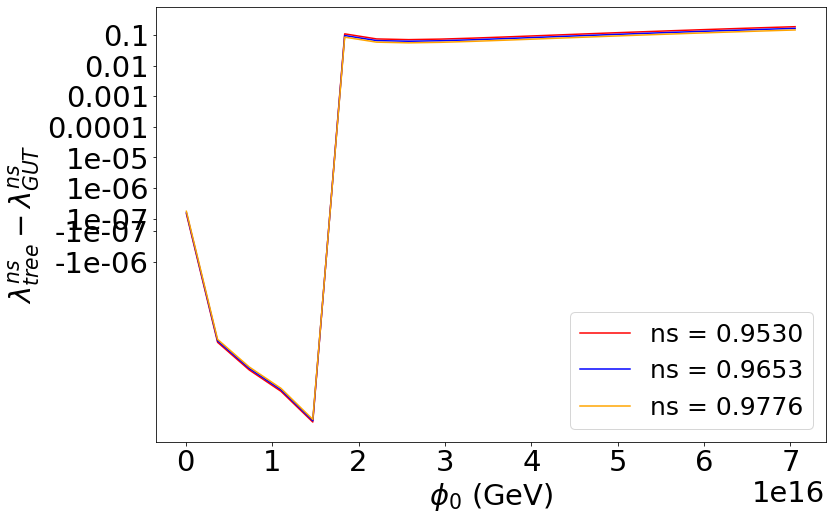

In [52]:
def symlog(array):
    symlog_array = []
    for x in array:
        if x<0:
            symlog_array.append(-(np.log10(-x)))
        if x>0:
            symlog_array.append(np.log10(x))
    return np.array(symlog_array)
    
print(pd_to_array(m0_Tree_lle_09530, 'lambda6')-pd_to_array(m0_lle_09530, 'lambda6'))

plt.figure(7)
print(symlog(pd_to_array(m0_Tree_udd_09530, 'lambda6')-pd_to_array(m0_udd_09530, 'lambda6')))
plt.plot(pd_to_array(m0_Tree_udd_09530, 'phi0B'), symlog(pd_to_array(m0_Tree_udd_09530, 'lambda6')-pd_to_array(m0_udd_09530, 'lambda6')),'red', label='ns = 0.9530')
plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), symlog(pd_to_array(m0_Tree_udd_09653, 'lambda6')-pd_to_array(m0_udd_09653, 'lambda6')),'blue', label='ns = 0.9653')
plt.plot(pd_to_array(m0_Tree_udd_09776, 'phi0B'), symlog(pd_to_array(m0_Tree_udd_09776, 'lambda6')-pd_to_array(m0_udd_09776, 'lambda6')),'orange', label='ns = 0.9776')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\lambda_{tree}^{ns}-\lambda_{GUT}^{ns}$')
plt.legend(fontsize=25)
plt.yticks([-1.2,-0.2,0.2,1.2,2.2,3.2,4.2,5.2,6.2],[-1e-6,-1e-7,1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1])  # Set label locations.
define_plot_resolution()